<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Content</h3>

* [1. Reading the Data](#1)
* [2. EDA: Exploring Insights](#2)
    - [2.1 An Overview from the Data](#2.1)
    - [2.2 Studying Space and Time Variables](#2.2)
    - [2.3 House Building Variabels](#2.3)
    - [2.4 Analysis of Location Features](#2.4)
* [3. Prep: Building Pipelines](#3) 
    - [3.1 Initial Pipeline](#3.1)
        - [3.1.1 Initial Drop](#3.1.1)
        - [3.1.2 Categorical Grouping](#3.1.2)
        - [3.1.3 Duplicated Data](#3.1.3)
        - [3.1.4 Target Log Transformation](#3.1.4)
        - [3.1.4 Training and Validation Data](#3.1.5)
        - [3.1.5 Building an Initial Pipeline](#3.1.6)
    - [3.2 Numerical Pipeline](#3.2)
        - [3.2.1 Null Data](#3.2.1)
        - [3.2.2 Log Distribution](#3.2.2)
        - [3.2.3 Scaling](#3.2.3)
        - [3.2.4 Building a Numerical Pipeline](#3.2.4)
    - [3.3 Categorical Pipeline](#3.3)
        - [3.3.1 Dummies Encoding](#3.3.1)
        - [3.3.2 Building a Categorical Pipeline](#3.3.2)
    - [3.4 Complete Pipelines](#3.4)
* [4. Modeling: Training Predictive Models](#4) 
    - [4.1 Structuring Variables](#4.1)
    - [4.2 Training Models](#4.2)
    - [4.3 Evaluating Performance](#4.3)
    - [4.4 Correlation Matrix](#4.4)
    - [4.5 Feature Importance](#4.5)
    - [4.6 Learning Curve](#4.6)
    - [4.7 Feature Selection](#4.7)
* [5. Predicting: Predicting House Prices](#5)

This notebook aims to allocate the development related to the exploratory analysis of insights related to the dataset [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) taken from Kaggle platform for improving skills in Data Science and Machine Learning. Also, this notebook uses the tools presented on [xplotter](https://github.com/ThiagoPanini/xplotter) and [mlcomposer](https://github.com/ThiagoPanini/mlcomposer) python packages made by myself and published on PyPI repository. This is a real good effort for coding useful functions for making the Exploratory Data Analysis and applying Machine Learning process a lot more easier for Data Scientists and Data Analysis through deliverying charts customization and matplotlib/seaborn plots with a little few lines of code. I really hope you all enjoy it!



___
**_Description and context:_**
_Ask a home buyer to describe the home of their dreams and he probably won't start the description with "basement ceiling height" or "proximity to an east-west railroad". However, the data set of this competition proves that there are influences in the negotiation of houses in addition to the number of bedrooms or bathrooms. With approximately 80 explanatory variables describing virtually any residential aspect of homes in Ames, Iowa, this competition challenges the user to predict the final price of homes._

At the same time, this notebook will be essential for the validation of new developments linked to the package I called [xplotter](https://github.com/ThiagoPanini/xplotter), a homemade library developed in order to facilitate all steps related to data analysis by exploration involving graphic plots.

In [1]:
!pip install xplotter --upgrade
!pip install mlcomposer --upgrade

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
     |████████████████████████████████| 42 kB 139 kB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
# Project libraries
import pandas as pd
import os
from warnings import filterwarnings
filterwarnings('ignore')

# Project variables
DATA_PATH = '../input/house-prices-advanced-regression-techniques/'
TRAIN_FILENAME = 'train.csv'
TEST_FILENAME = 'test.csv'

<a id="1"></a>
<font color="darkslateblue" size=+2.5><b>1. Reading the Data</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

After importing the main libraries common to the project and also defining important variables for reading the data, it is possible to make the first contact with the database available for the development of the task.

In [3]:
# Reading training data
df = pd.read_csv(os.path.join(DATA_PATH, TRAIN_FILENAME))
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

With the reading of the data, it is possible to consult the [metadata] page (https://www.kaggle.com/c/house-prices-advanced-regression-techniques) to extract the meaning of each of the 80 columns available in base:

* **_1stFlrSF_**: Total area of ​​the first floor of the house
* **_2ndFlrSF_**: Total area of ​​the second floor of the house
* **_3SsnPorch_**: Varande area of ​​three seasons (?)
* **_Alley_**: Characteristic of the alley that gives access to housing
* **_BedroomAbvGr_**: Number of beds in the house (above the basement)
* **_BldgType_**: Type of housing
* **_BsmtCond_**: Classifies the basement's general condition
* **_BsmtExposure_**: Exposition of the basement of the dwelling
* **_BsmtFinSF1_**: Area covered by type 1 finish (BsmtFinType1 attribute)
* **_BsmtFinSF2_**: Area covered by type 2 finish (BsmtFinType2 attribute)
* **_BsmtFinType1_**: Score of the finish of the basement-related region
* **_BsmtFinType2_**: Score of the finish of the basement-related region (if more than one exists)
* **_BsmtFullBath_**: Full bathrooms in the basement-related area
* **_BsmtHalfBath_**: Incomplete bathrooms (half) of the basement-related area
* **_BsmtQual_**: Classifies the house according to the size of the basement
* **_BsmtUnfSF_**: Basement area without finishing
* **_CentralAir_**: Defines whether or not there is a central air conditioner (Boolean attribute)
* **_Condition1_**: Proximity to important points in the city
* **_Condition2_**: Proximity to important points in the city (if there are more than one)
* **_Electrical_**: Type of home electrical system
* **_EnclosedPorch_**: Closed balcony area in the house
* **_ExterCond_**: Condition of the external material on the observation date
* **_Exterior1st_**: External coverage of the house
* **_Exterior2nd_**: External roof of the house (if there is more than one roof)
* **_ExterQual_**: Quality of the material used abroad
* **_Fence_**: Quality of the enclosure present in the house
* **_FireplaceQu_**: Quality of fireplaces
* **_Fireplaces_**: Number of fireplaces in the house
* **_Foundation_**: Type of foundation used in construction
* **_FullBath_**: Number of full bathrooms in the house (above the basement)
* **_Functional_**: Describes features of the house under warranty
* **_GarageArea_**: Garage area in square meters
* **_GarageCars_**: Size of the garage related to the number of possible cars
* **_GarageCond_**: Score that defines the conditions of the garage
* **_GarageFinish_**: Internal garage finish
* **_GarageQual_**: Quality of the garage
* **_GarageType_**: Type of garage in the house
* **_GarageYrBlt_**: Year of construction of the garage
* **_GrLivArea_**: Total living room area
* **_HalfBath_**: Number of incomplete bathrooms (half) in the house (above the basement)
* **_Heating_**: Type of house heating
* **_HeatingQC_**: Heating quality
* **_HouseStyle_**: Housing style
* **_KitchenAbvGr_**: Number of kitchens in the house (above the basement)
* **_KitchenQual_**: Quality of the kitchens
* **_LandContour_**: Housing leveling
* **_LandSlope_**: Property slope
* **_LotArea_**: Allotment area
* **_LotConfig_**: Allotment configuration
* **_LotFrontage_**: Dimension of the front perimeter of the house
* **_LotShape_**: General housing format
* **_LowQualFinSF_**: Total area of ​​low quality finishes throughout the house
* **_MasVnrArea_**: Area covered by masonry
* **_MasVnrType_**: Type of masonry used
* **_MiscFeature_**: Some features not included in other categories
* **_MiscVal_**: Value of features not included in quantity criteria
* **_MoSold_**: Month in which the sale of the house was made
* **_MSSubClass_**: Identifies the type of residence
* **_MSZoning_**: Classifies the property by zone
* **_Neighborhood_**: Locality related to city boundaries
* **_variable_name_**: description
* **_OpenPorchSF_**: Open balcony area in the house
* **_OverallCond_**: Score of the general condition of the house
* **_OverallQual_**: Score of the material and finish of the house
* **_PavedDrive_**: Attribute that defines the paving of the street (inside the house)
* **_PoolArea_**: Pool area in the house
* **_PoolQC_**: Quality of the pool
* **_RoodMatl_**: Material used in the roof (roof)
* **_RoofStyle_**: Type of roof of the house (roof)
* **_SaleCondition_**: Conditions of sale
* **_SaleType_**: Type of sale
* **_ScreenPorch_**: Screen area on the balcony of the house
* **_Street_**: Characteristic of the street that gives access to housing
* **_TotalBsmtSF_**: Total hold area
* **_TotRmsAbvGrd_**: Total number of rooms in the house (above the basement)
* **_Utilities_**: Utilities
* **_WoodDeckSF_**: Wooden deck area present in the house
* **_YearBuilt_**: Year of construction of the house
* **_YearRemodAdd_**: Year of remodeling of the house (same as YearBuilt if the house has not been remodeled)
* **_YrSold_**: Year in which the sale of the house was made

<a id="2"></a>
<font color="darkslateblue" size=+2.5><b>2. EDA: Exploring Insights</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

At this point, there is a well-defined context of the project's objective, in addition to a database already read and transformed into a DataFrame format of the pandas. From this moment on, a true scan of the data will be proposed for the application of a detailed descriptive analysis in order to gather relevant insights for the business context.

Using the homemade package [xplotter](https://github.com/ThiagoPanini/xplotter), whose construction was motivated exactly to facilitate the work of data scientists in the pillars of insights and exploratory data analysis. The next steps will be based on the tools provided from xplotter library to make beautiful charts in order to get a deep understand of our data. 

<a id="2.1"></a>
<font color="dimgrey" size=+2.0><b>2.1 An Overview from the Data</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

This project has a particularity: the presence of a large number of variables available for analysis. Thus, so that the project is not extremely extensive from the individual analysis of each of the variables, it is important to provide an overview of the attributes present in the data set with some relevant points that can assist future analysis decisions.

For that, the `data_overview()` function will be used, which, in turn, performs a series of useful analyzes on the base as a whole, finally returning relevant characteristics for each of the present attributes.

In [4]:
# Importing libraries and defining target tariable
from xplotter.insights import *

TARGET = 'SalePrice'

df_overview = data_overview(df=df, corr=True, target=TARGET)
print(f'Some of the features and its metadata')
df_overview.head(25)

Some of the features and its metadata


feature  qtd_null  pct_null    dtype  qtd_cat  target_pearson_corr
0         PoolQC      1453  0.995205   object        3                  NaN
1    MiscFeature      1406  0.963014   object        4                  NaN
2          Alley      1369  0.937671   object        2                  NaN
3          Fence      1179  0.807534   object        4                  NaN
4    FireplaceQu       690  0.472603   object        5                  NaN
5    LotFrontage       259  0.177397  float64        0             0.351799
6    GarageYrBlt        81  0.055479  float64        0             0.486362
7     GarageCond        81  0.055479   object        5                  NaN
8     GarageType        81  0.055479   object        6                  NaN
9   GarageFinish        81  0.055479   object        3                  NaN
10    GarageQual        81  0.055479   object        5                  NaN
11  BsmtFinType2        38  0.026027   object        6                  NaN
12  BsmtExposure        38  0.026027   object        4                  NaN
13      BsmtQual        37  0.025342   object        4                  NaN
14      BsmtCond        37  0.025342   object        4                  NaN
15  BsmtFinType1        37  0.025342   object        6                  NaN
16    MasVnrArea         8  0.005479  float64        0             0.477493
17    MasVnrType         8  0.005479   object        4                  NaN
18    Electrical         1  0.000685   object        5                  NaN
19            Id         0  0.000000    int64        0            -0.021917
20    Functional         0  0.000000   object        7                  NaN
21    Fireplaces         0  0.000000    int64        0             0.466929
22   KitchenQual         0  0.000000   object        4                  NaN
23  KitchenAbvGr         0  0.000000    int64        0            -0.135907
24  BedroomAbvGr         0  0.000000    int64        0             0.168213

When executing the `data_overview()` function, it is possible to return, for each of the attributes, the following information:

* **qtd_null**: amount of null data present in the respective column;
* **pct_null**: percentage of null data in the respective column;
* **dtype**: primitive type related to the column;
* **qtd_cat**: number of different categories (in the case of categorical variables);
* **target_pearson_corr**: correlation with the target variable.

Thus, it is possible to notice some interesting particularities:

* The `PoolQC` variable has 99.5% of null entries in the database. In practice, this variable indicates the quality of the pool present in the property and, null data probably indicates that the property does not have a pool;
* The `MiscFeature`,` Alley` and `Fence` variables also have a high amount of null data. In practice, as in `PoolQC`, these variables describe specific and particular characteristics of the properties, which, in fact, may not be present in the vast majority of houses;
* Looking at the list ordered by amount of null data, it is possible to notice that the variables `GarageYrBlt`,` MasVnrArea` and `Fireplaces` have high correlations with the target variable (` SalePrice`) and this may be a good investigative factor in the future

In [5]:
# Top features by categorical entries
df_overview.sort_values(by='qtd_cat', ascending=False).head()

feature  qtd_null  pct_null   dtype  qtd_cat  target_pearson_corr
53  Neighborhood         0       0.0  object       25                  NaN
77   Exterior2nd         0       0.0  object       16                  NaN
78   Exterior1st         0       0.0  object       15                  NaN
52    Condition1         0       0.0  object        9                  NaN
42      SaleType         0       0.0  object        9                  NaN

In [6]:
# Top features by positive correlation with target
df_overview.sort_values(by='target_pearson_corr', ascending=False).head()

feature  qtd_null  pct_null  dtype  qtd_cat  target_pearson_corr
80    SalePrice         0       0.0  int64        0             1.000000
48  OverallQual         0       0.0  int64        0             0.790982
30    GrLivArea         0       0.0  int64        0             0.708624
29   GarageCars         0       0.0  int64        0             0.640409
31   GarageArea         0       0.0  int64        0             0.623431

The two sets above show the main variables by:
1. Number of categorical entries
2. Greater positive correlation with the target variable

These two scenarios allow analyzing in greater depth the possible steps to be considered in the Prep stage of the database. For example, it is necessary to consider that the variable `Neighborhood`, when receiving the procedure of` encoding`, will generate 26 additional columns in the final base.

<a id="2.2"></a>
<font color="dimgrey" size=+2.0><b>2.2 Studying Space and Time Variables</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

After an initial analysis of the variables present in the database as a whole, it is important to define the next steps for data exploration in view of the large number of features present. Thus, the strategy adopted is to categorize the base columns in three different contexts:

* **_Space and Environment Variables_**: analyzes related to variables that describe the situation of the property in terms of space and environment;
* **_Construction Variables_**: insights taken from variables that indicate construction characteristics of the property;
* **_Location Variables_**: graphical analysis on variables that bring information related to the location of the property.

In this session, the variables related to "Space and Environment" will be analyzed, creating specific sets of features and making graphical plots in order to verify the statistical characteristics of the features and their respective relationships with the target variable.

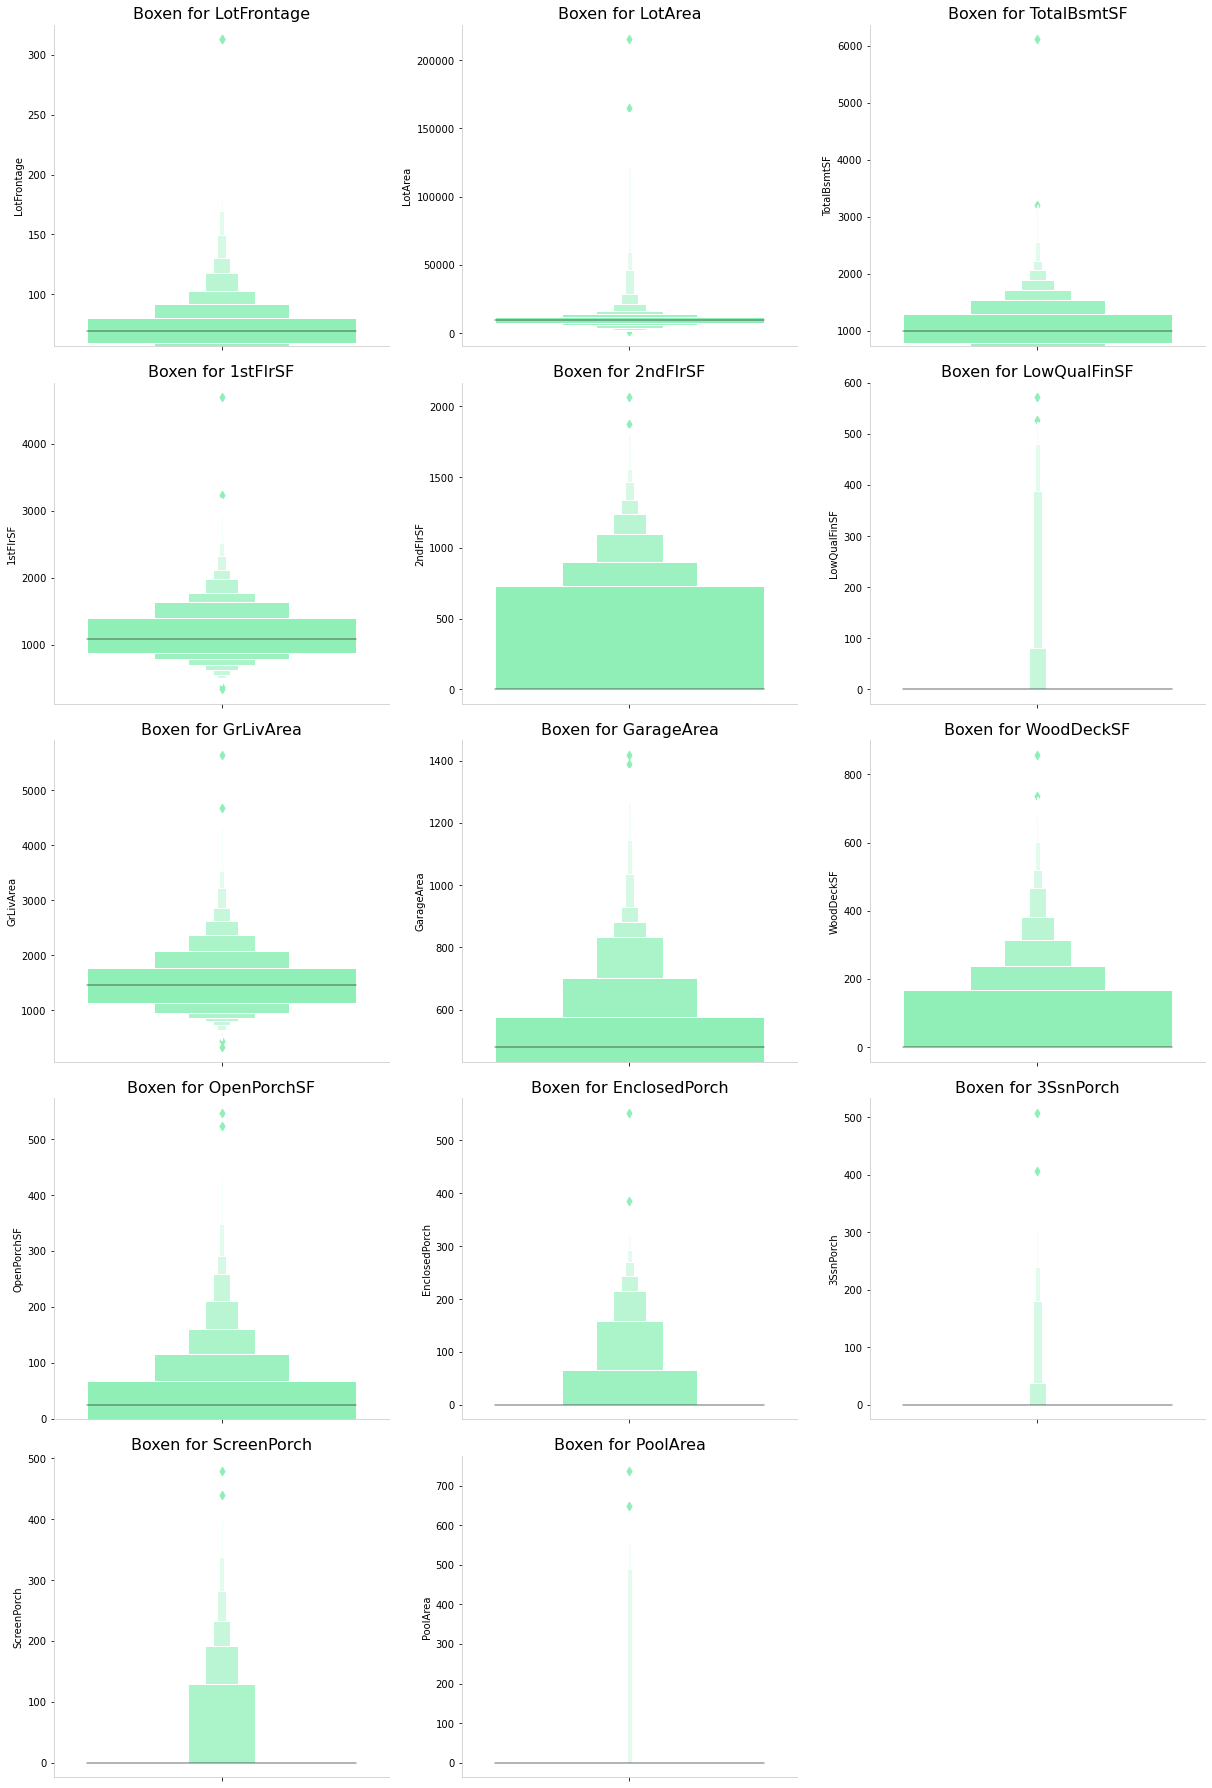

In [7]:
# Splitting housing space features
space_cols = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 
              'BsmtQual', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 
              'GarageType', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 
              'LowQualFinSF', 'MoSold', 'OpenPorchSF', 'PoolArea', 'SaleCondition', 'SaleType',
              'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF', 'YrSold']

# Numerical features with a continuous approach
num_space_cols = ['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                  'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                  'ScreenPorch', 'PoolArea']

# Numerical feateures with a discreet approach
cat_space_cols = ['BsmtQual', 'GarageType', 'SaleType', 'SaleCondition', 'BsmtFullBath', 'BsmtHalfBath',
                  'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
                  'GarageCars', 'MoSold', 'YrSold']

# Plottinghousing space features distribution
plot_multiple_distplots(df=df, col_list=num_space_cols, kind='boxen')

The plotting figure above, generated by the `plot_multiple_distplot ()` function of the `pycomp.viz.insights` module, consolidates distribution graphs for a specific set of continuous variables within the context of" Space and Environment "of the properties. In it, it is possible to visualize how some features behave within the proposed dataset and, among the possible conclusions, it is possible to score:

* The variables `LotFrontage`,` TotalBsmtSF`, `1stFlrSF` and` GrLivArea` have distributions that resemble the normal Gaussian distribution, thus allowing the removal of clear visual conclusions from specific statistical parameters (such as the mean, standard deviation, among others) );
* Some other variables, such as `LowQualFnSF`,` EnclosedPorch`, `ScreenPorch` and` PoolArea` have distributions similar to discrete variables, containing high peaks at 0 (or close to 0).

To complement this analysis and add a visualization that allows analyzing the relationship of some variables with the target variable (`SalePrice`), it is possible to execute the function` plot_multiple_dist_scatterplot () `.

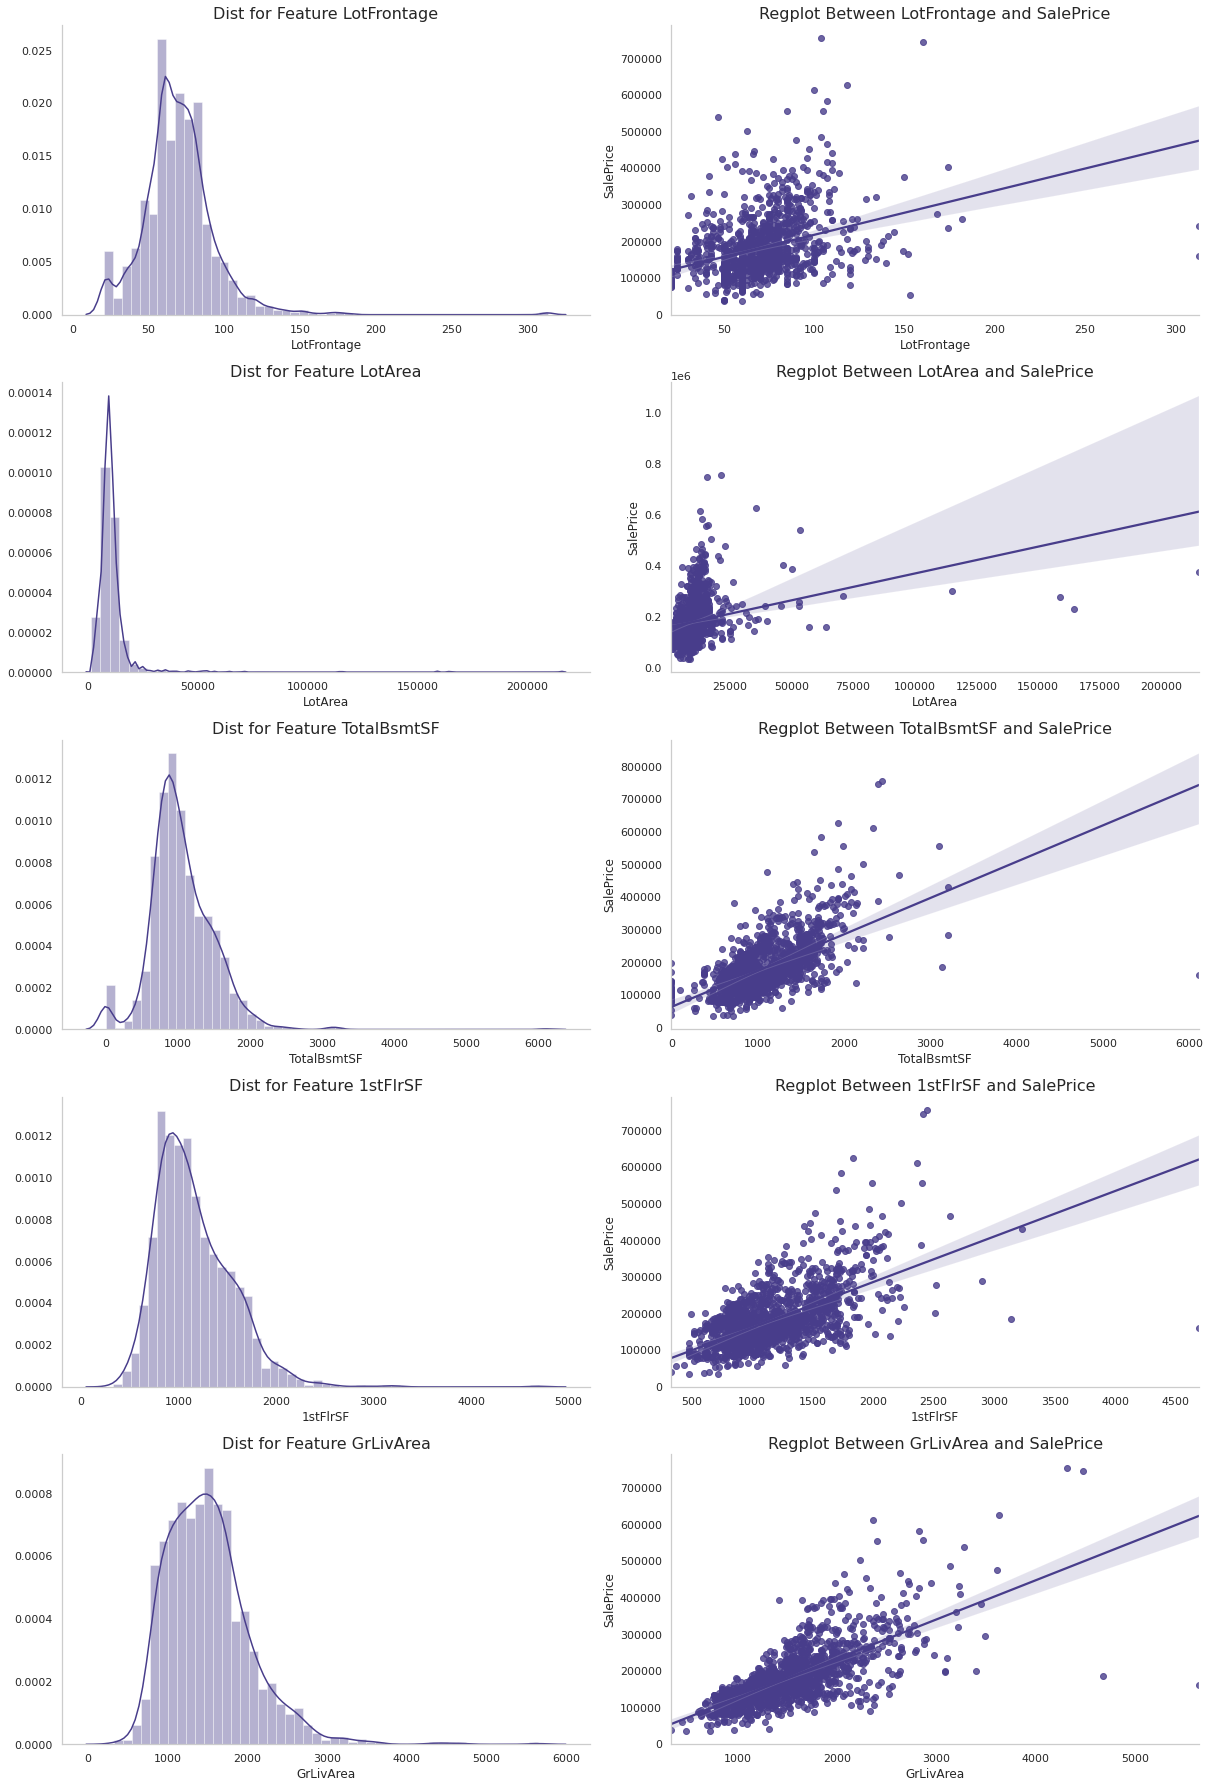

In [8]:
normal_dist_num_space_cols = ['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']
plot_multiple_dist_scatterplot(df=df, col_list=normal_dist_num_space_cols, y_col='SalePrice')

Through the analysis of the above plot, it is possible to notice some interesting correlations between the selected variables and the respective price of the registered property. In all observed cases, there is a positive correlation, indicating that the target variable and each of the variables selected above have a directly proportional relationship. In practice, these variables indicate information related to **area** of environments (lot, basement, land, garage, among others), thus allowing a direct and generic conclusion: "the bigger the environment, the more expensive the property".

This visualization is extremely important because, given the behavior observed above, it is possible to state that these variables can have a good influence during the training phase of a predictive model. Another way of visualizing this relationship is from a correlation matrix, which will be analyzed in the future, after the data preparation stage.

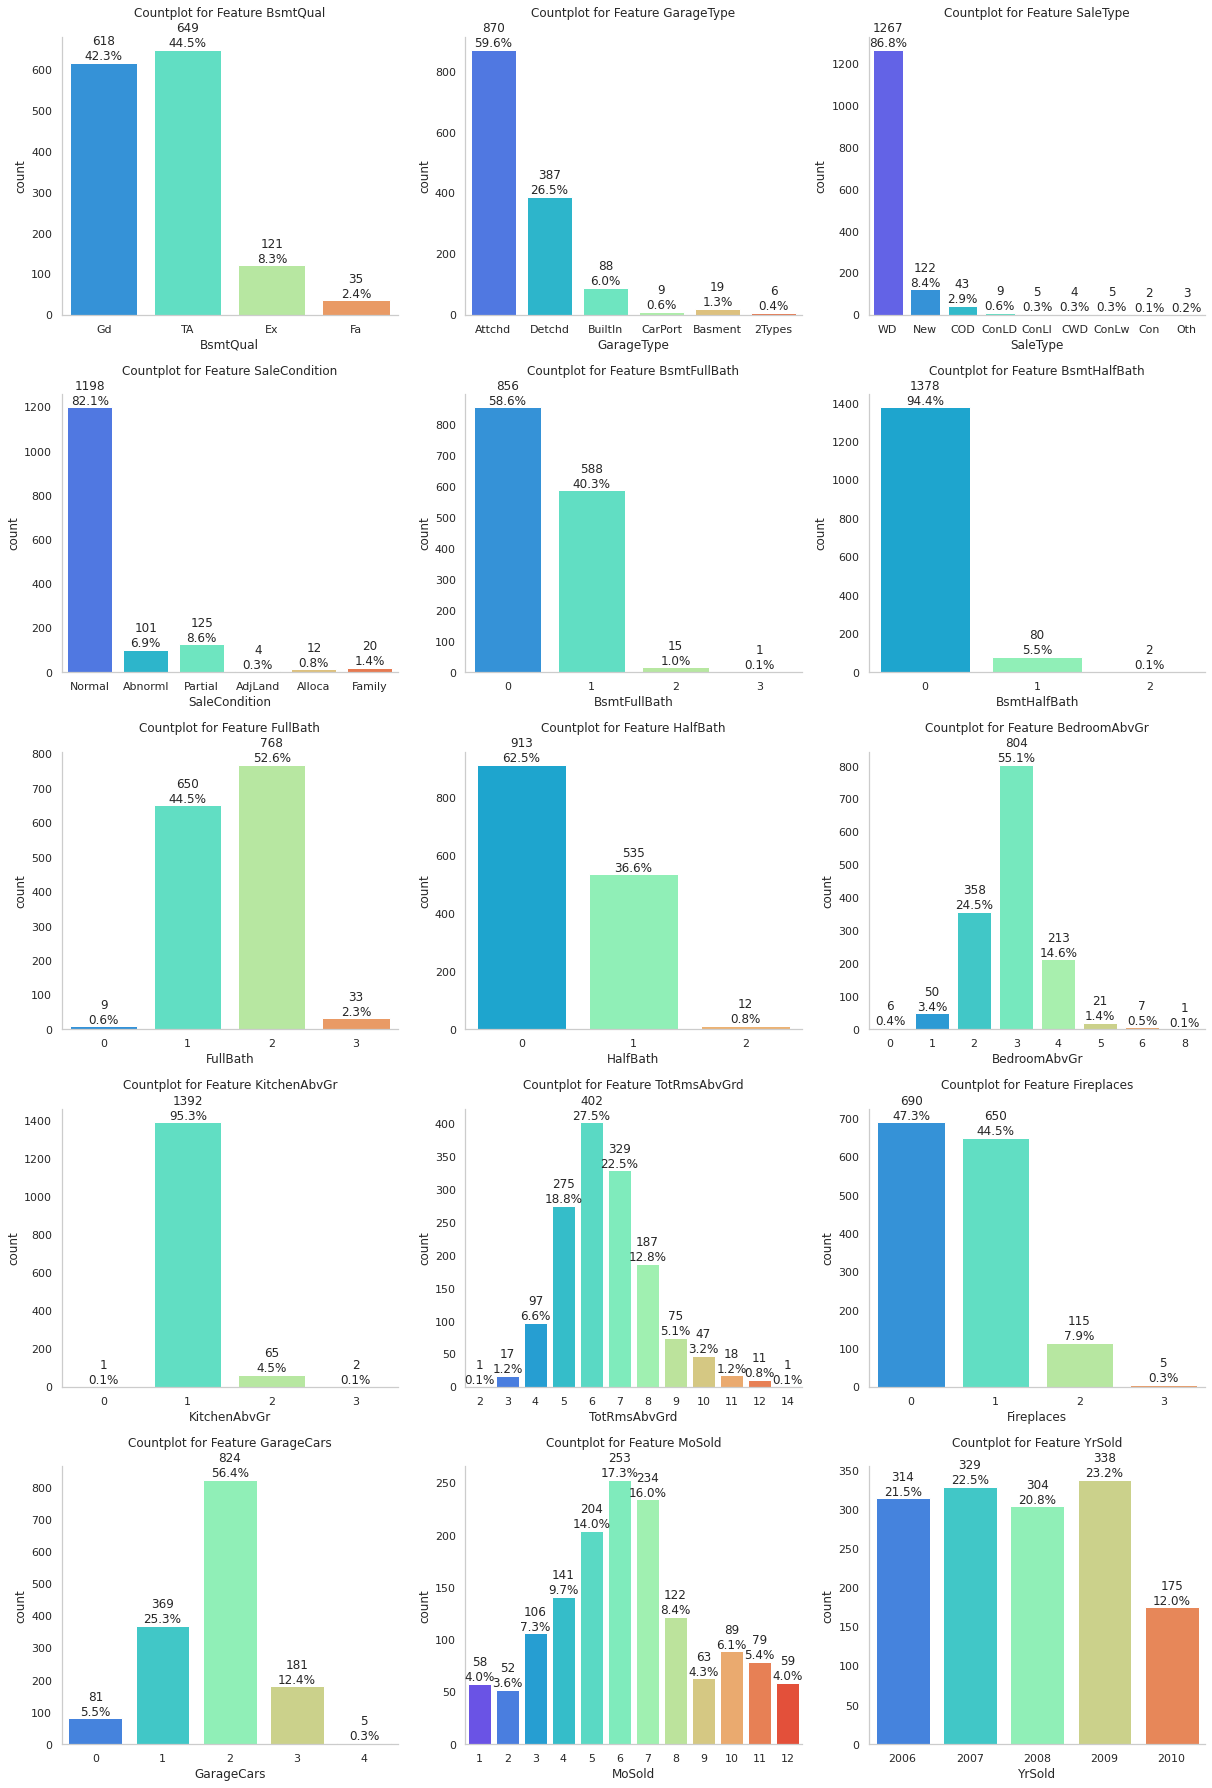

In [9]:
plot_multiple_countplots(df=df, col_list=cat_space_cols, orient='v')

The plotting figure above, generated by the `plot_multiple_countplots()` function of the `xplotter.insights` module, provides a general overview of the volumes linked to each of the inputs of some environment and space variables classified as categorical. Despite the large number of visions linked, it is possible to extract some relevant insights, such as:

* There is a greater historical trend in sales in months 5, 6 and 7 that can be seen in the volume plot for the variable `MoSold`;
* Most of the properties present in the base have a 2-car garage, a fact that can be verified by plotting by `GarageCars`;
* Most houses do not have a fireplace, however a relevant portion has at least 1 fireplace (analysis by `Fireplaces`.

Similar to the one performed above with the `plot_multiple_dist_scatterplot()` function, the view below aims to graphically analyze the data of some variables and relate them to a target variable, extracting statistical indicators such as mean, median, standard deviation, among others.

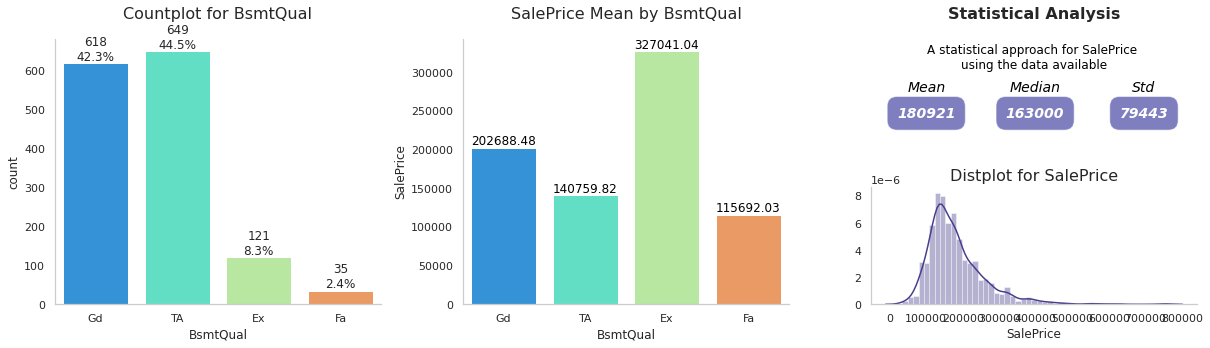

In [10]:
plot_cat_aggreg_report(df=df, cat_col='BsmtQual', value_col=TARGET, title3='Statistical Analysis', 
                       desc_text=f'A statistical approach for {TARGET} \nusing the data available',
                       stat_title_mean='Mean', stat_title_median='Median', stat_title_std='Std')

Above, it is possible to view the result of executing the function `plot_cat_aggreg_report()`, which is built to provide a complete analysis involving a _category_ column and a _numeric column_, analyzing the volumes involved and the main statistical parameters (such as mean, median and deviation standard).

In this way, it is possible to view the results of the categorical variable `BsmtQual`, which, in turn, brings a discreet relationship of the quality of the basement, with the variable` SalePrice`, representing the real price of the property. With this, it is possible to score:

1. Most houses have `TA` and` Gd` qualities for the cellars;
2. Properties with “Ex” quality cellars have the highest average price;
3. The average price of properties with `Ex` and` Gd` basements are higher than the general average of the base.

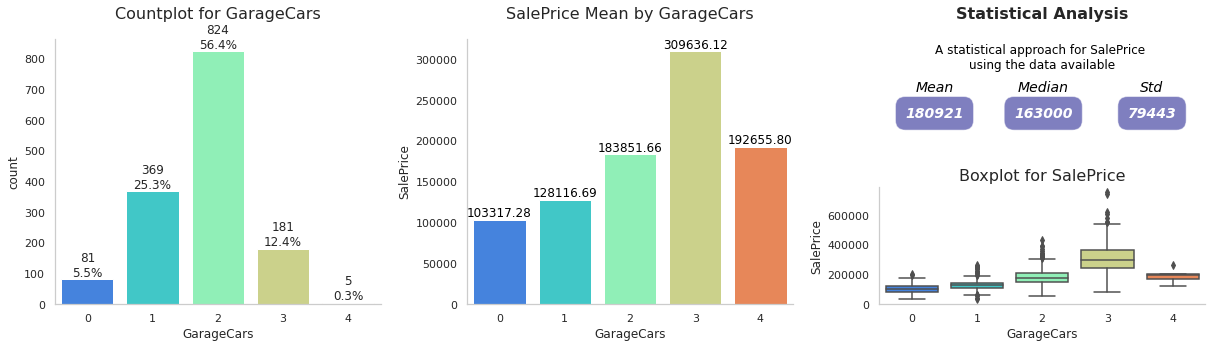

In [11]:
plot_cat_aggreg_report(df=df, cat_col='GarageCars', value_col=TARGET, title3='Statistical Analysis', 
                       desc_text=f'A statistical approach for {TARGET} \nusing the data available',
                       stat_title_mean='Mean', stat_title_median='Median', stat_title_std='Std', dist_kind='box')

Above, we can see a relationship between `GarageCars` (space for cars in the garage) and` SalePrice`. The report shows us that, although most properties have space for 2 cars in the garage, the highest average price is associated with those that have space for 3 cars.

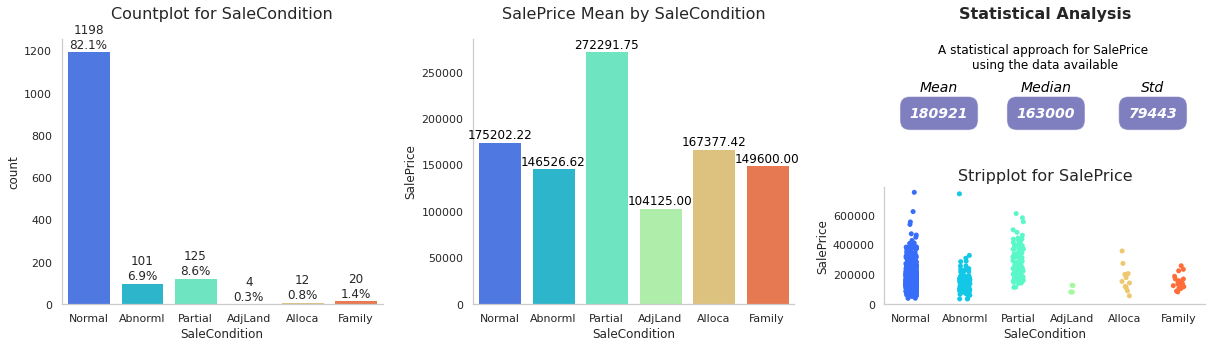

In [12]:
plot_cat_aggreg_report(df=df, cat_col='SaleCondition', value_col=TARGET, title3='Statistical Analysis', 
                       desc_text=f'A statistical approach for {TARGET} \nusing the data available',
                       stat_title_mean='Mean', stat_title_median='Median', stat_title_std='Std', dist_kind='strip')

In a combination of analysis, it is possible to check the report generated for the variables `SaleCondition` and` SalePrice`. In it, it can be seen that most of the houses were sold under the "Normal" condition, while the highest average of real estate prices came from sales under the "Partial" condition.

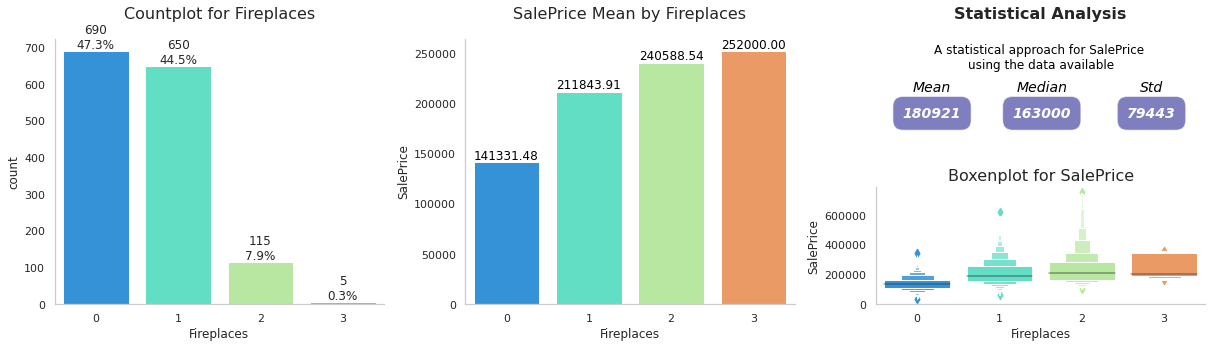

In [13]:
plot_cat_aggreg_report(df=df, cat_col='Fireplaces', value_col=TARGET, title3='Statistical Analysis', 
                       desc_text=f'A statistical approach for {TARGET} \nusing the data available',
                       stat_title_mean='Mean', stat_title_median='Median', stat_title_std='Std', dist_kind='boxen')

Finally, another relevant analysis placed above is the relationship between `Fireplaces` and the price of real estate. Here you can see a clear trend between the number of fireplaces present in the house and their respective price. Despite being a minority, buildings with 5 fireplaces have the highest average base price.

___

It would be relevant, within the proposal to explore this set of features, to visualize a list of real estate prices over time. In the base available for analysis and, more specifically there are two columns `MoSold` and` YrSold`. At this moment, we have the possibility to build a customized column concatenating the year (`YrSold`) and the month (` MoSold`) of sale of the property, thus generating the possibility to analyze the evolution of sales over time.

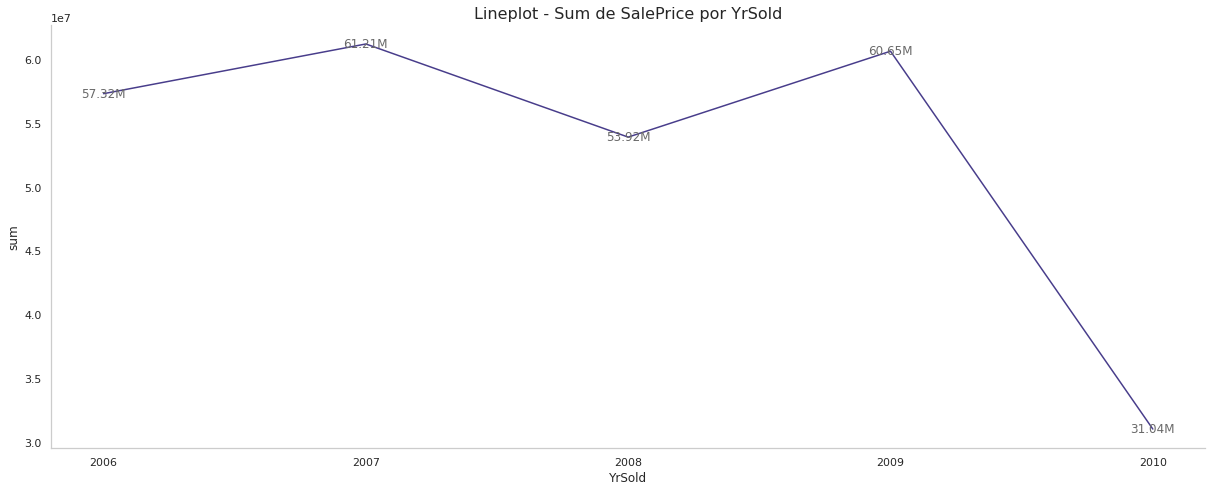

In [14]:
plot_evolutionplot(df=df, x='YrSold', y='SalePrice', agg_type='sum', date_col=False, x_rot=0, 
                   label_aggreg='M')

With the `plot_evolutionplot()` function of the `xplotter` package, it was possible to plot, just above, an evolutionary historical view of the total sum of real estate values over the **years**. Thus, it is possible to perceive the variations relevant to each season, and it is possible to conclude that 2007 was probably the best year in terms of real estate values. Additionally, it is possible to notice that the year of 2010 probably does not have a completion closing, which explains the low value registered for that year.

Among the arguments of the `plot_evolutionplot()` function, it is possible to specify new breaks or new columns for evolutionary analysis to be plotted on the x axis. Thus, we will display, below, a graph of the sum of real estate prices per month.

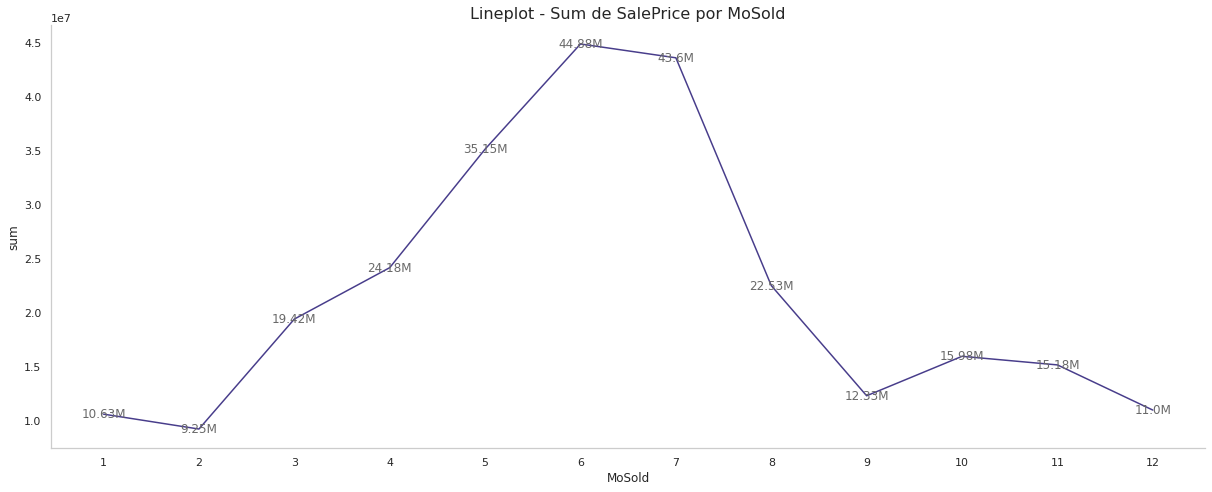

In [15]:
plot_evolutionplot(df=df, x='MoSold', y='SalePrice', agg_type='sum', date_col=False, x_rot=0, label_aggreg='M')

Using the base 'MoSold` column, it is possible to view a total sum of real estate prices for each of the months registered. In this way it is possible to conclude some important and relevant points for the business context to which we are inserted:

1. There is a natural growth in property sales between months 5 and 7
2. The first and last months of the year are not the best for the real estate industry

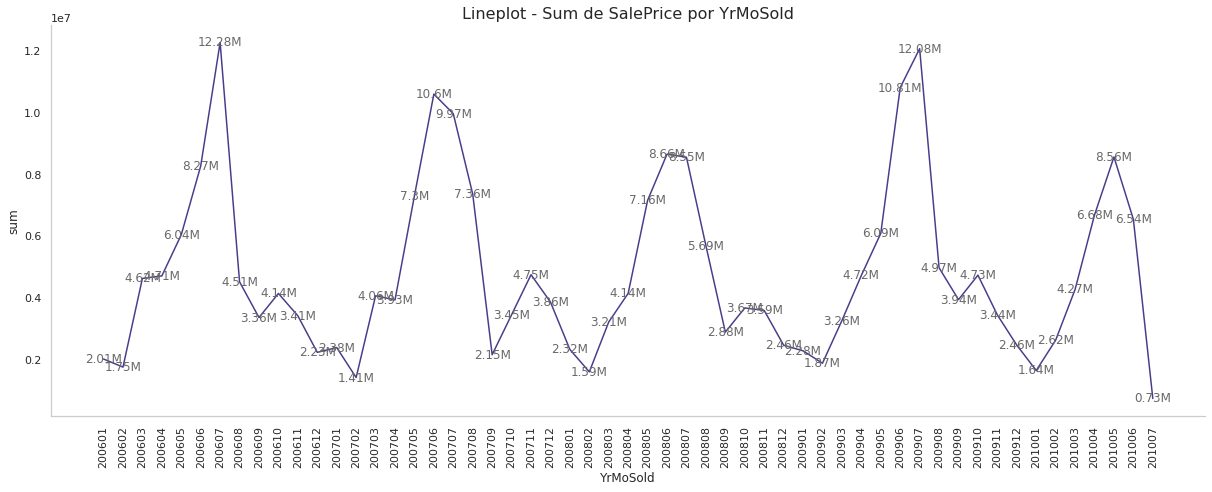

In [16]:
df_tmp = df.copy()
df_tmp['YrMoSold'] = (df_tmp['YrSold'] * 100 + df_tmp['MoSold'])
plot_evolutionplot(df=df_tmp, x='YrMoSold', y='SalePrice', agg_type='sum', date_col=False, label_aggreg='M')

Concluding this set of evolutionary analyzes by total sum of prices, we have a totally historical analysis that unites the `YrSold` and` MoSold` columns into one: the customized `YrMoSold` column, which, in turn, brings a unique year reference and month of sale of the property. From the historical analysis in that column, it is possible to notice all fluctuations involving the entire base period. An interesting point to be mentioned are the peak sales in 2009 and 200606. Another interesting factor is the presence of a kind of "standard" of the market in relation to property sales: the characteristic curve seems to be repeated year by year in terms prices and sales.

Still within the `plot_evolutionplot()` function, it is possible to enrich this historical analysis using the function's `hue` argument. With it, it is possible to select different breaks to check the historical line for each categorical entry. In the graph below, we will analyze an "average" of house prices by the variable `SaleCondition`

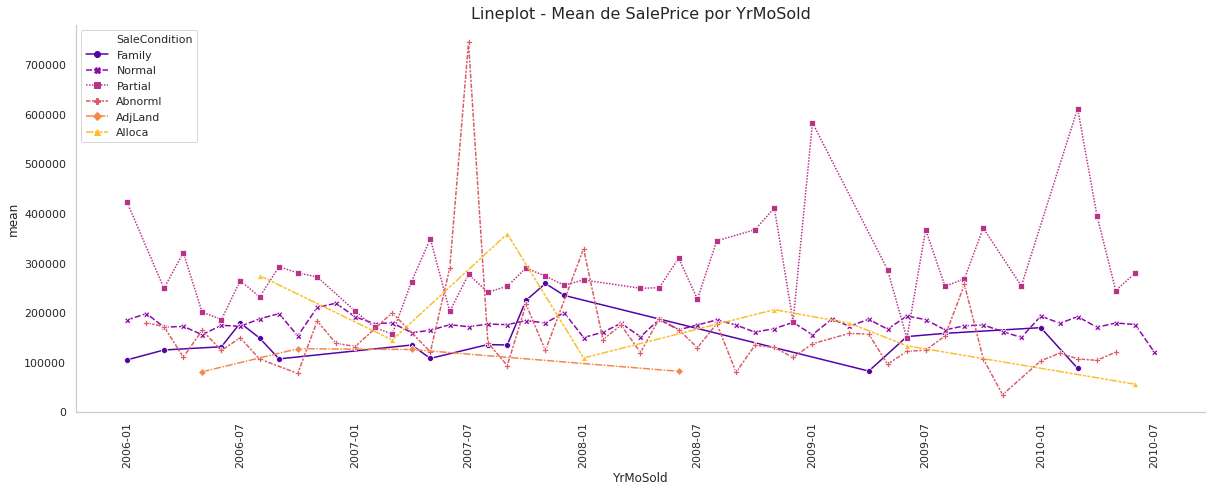

In [17]:
plot_evolutionplot(df=df_tmp, x='YrMoSold', y='SalePrice', hue='SaleCondition', agg_type='mean', 
                   label_data=False, style='SaleCondition', palette='plasma')

The graph above shows the evolution of property sales from the condition recorded for the given property. It is interesting to mention how the evolution of properties classified as `Partial` grew over the last months of registration. Another interesting point is the peak of sales of properties classified as `Abnorml` in 2007-07, followed by a sharp decrease in the following month.

Below, we will plot a similar view of evolution, but considering a break by `Fireplaces`. Let's see how fireplaces have influenced property sales over time.

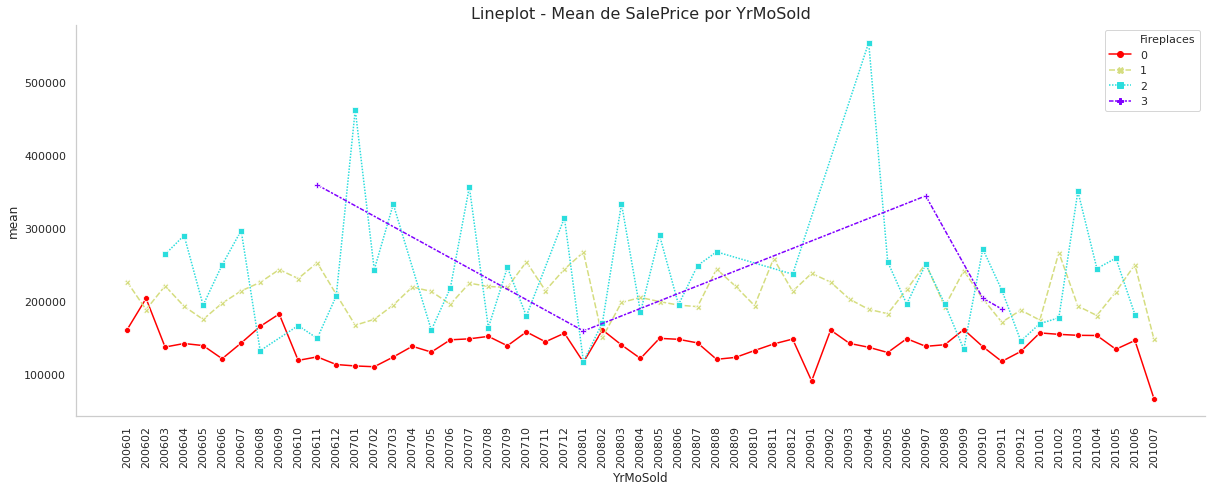

In [18]:
plot_evolutionplot(df=df_tmp, x='YrMoSold', y='SalePrice', hue='Fireplaces', agg_type='mean', 
                   date_col=False, label_data=False, style='Fireplaces')

The chart above shows us an average of real estate prices by the number of fireplaces present. In it, it is possible to clearly see how houses that do not have a fireplace (red line) really have a lower average sales price. On the other side of the spectrum, houses with 2 fireplaces are those with the highest average price recorded. Sporadically, we have a few months of sales of properties with 3 fireplaces, always with a high price (analysis hampered by the low amount of properties of this type).

<a id="2.3"></a>
<font color="dimgrey" size=+2.0><b>2.3 House Building Variabels</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

After a relevant analysis of the variables classified in the group "Environment, Space and Time" of the properties, we will propose an in-depth study of the features of the group "Construction" of the properties. In this session, we will investigate the main variables present in this group and their relevant relevance in relation to the price registered in the property.

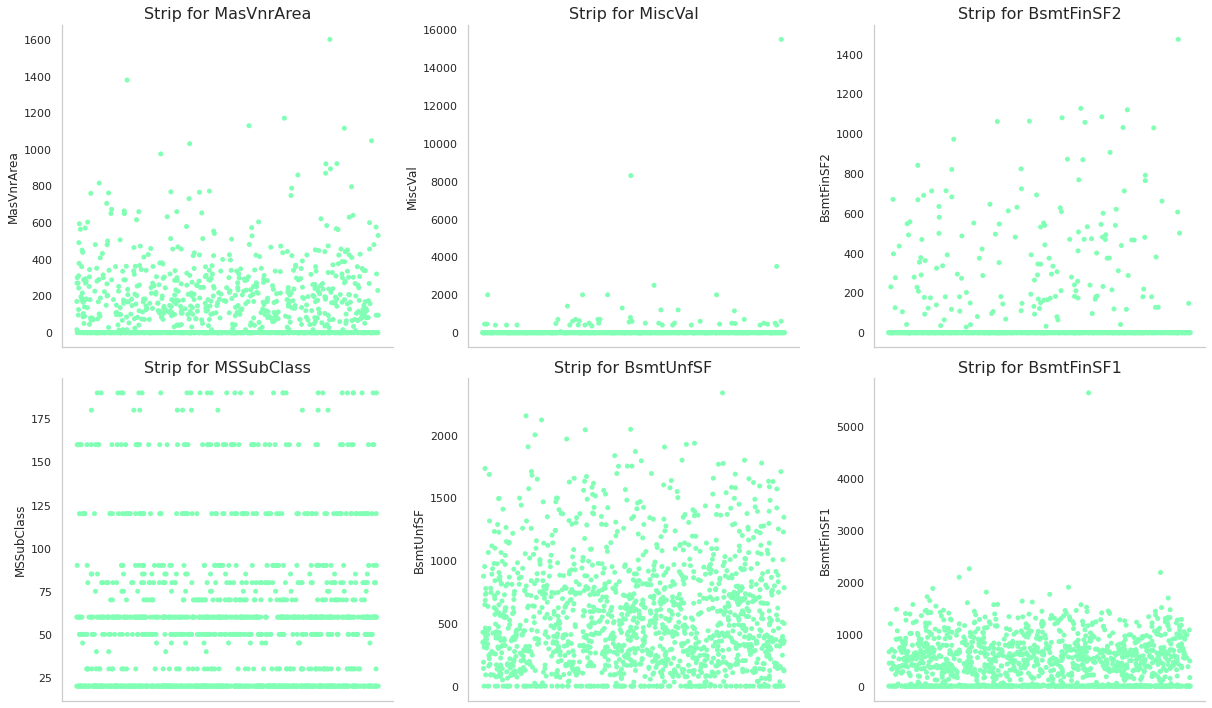

In [19]:
# Splitting building features
building_cols = ['MSSubClass', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                 'LandSlope', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 
                 'YearRemodAdd', 'RoofStyle', 'RoodMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure',
                 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating',
                 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
                 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
                 'Fence', 'MiscFeature', 'MiscVal']

# Building features with numerical meaning
num_building_cols = ['MasVnrArea', 'MiscVal', 'BsmtFinSF2', 'MSSubClass', 'BsmtUnfSF', 'BsmtFinSF1']

# Building features with categorical meaning
cat_building_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish',
                  'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtFinType1', 'MasVnrType',
                  'Electrical', 'Functional', 'KitchenQual', 'PavedDrive', 'HeatingQC', 'LandSlope',
                  'HouseStyle', 'BldgType', 'LotConfig', 'Utilities', 'LandContour', 'LotShape',
                  'Street', 'CentralAir', 'Heating', 'RoofStyle', 'Foundation', 'ExterCond', 'ExterQual',
                  'Exterior2nd', 'Exterior1st', 'OverallQual', 'OverallCond', 'YearRemodAdd',
                  'GarageYrBlt', 'YearBuilt']

# Plotting distribution of building numerical features
plot_multiple_distplots(df=df, col_list=num_building_cols, kind='strip')

The sequence of graphs above shows a distribution view for some variables classified as real estate "Construction" variables. In this group, it is possible to find few numerical variables, which are related to the _area_ of the property or to some indicator linked to _quality_ of the same.

In the view below, we will propose a broader view of the _construction_ variables through a categorical plot of volumetries.

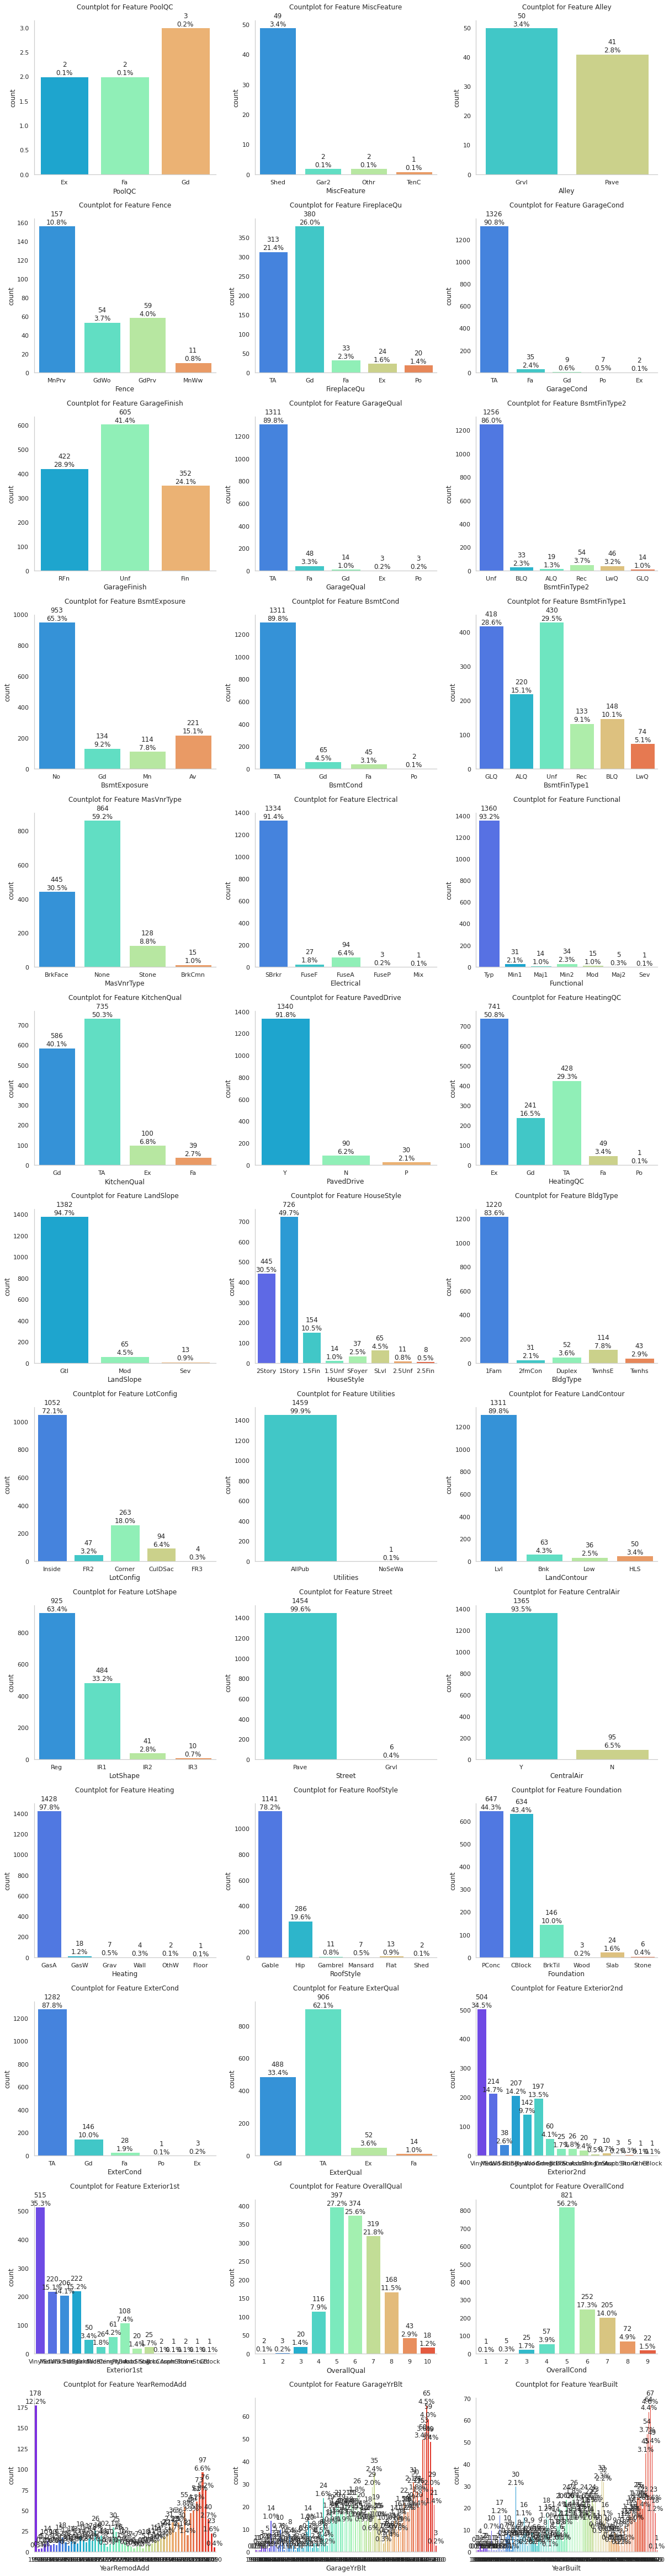

In [20]:
# Categorical analysis
plot_multiple_countplots(df=df, col_list=cat_building_cols)

In the categorical view of multiple columns, it is possible to analyze exactly the context related to the construction variables. Many of the features in this group indicate some criteria of _quality_ of the property, from the finish of the basement to the outside. Some of the variables have an extremely large number of categories, for example, the year of construction of the garage and the type of the outer floor of the second floor.

It is important to mention that, during the preparation phases of the base for the training of a predictive model, it will be possible to apply `encoding` processes to treat categorical entries and separate them in columns. This will probably create an extremely high number of features in the base, a fact that can be dealt with from `feature selection` procedures embedded in pipelines

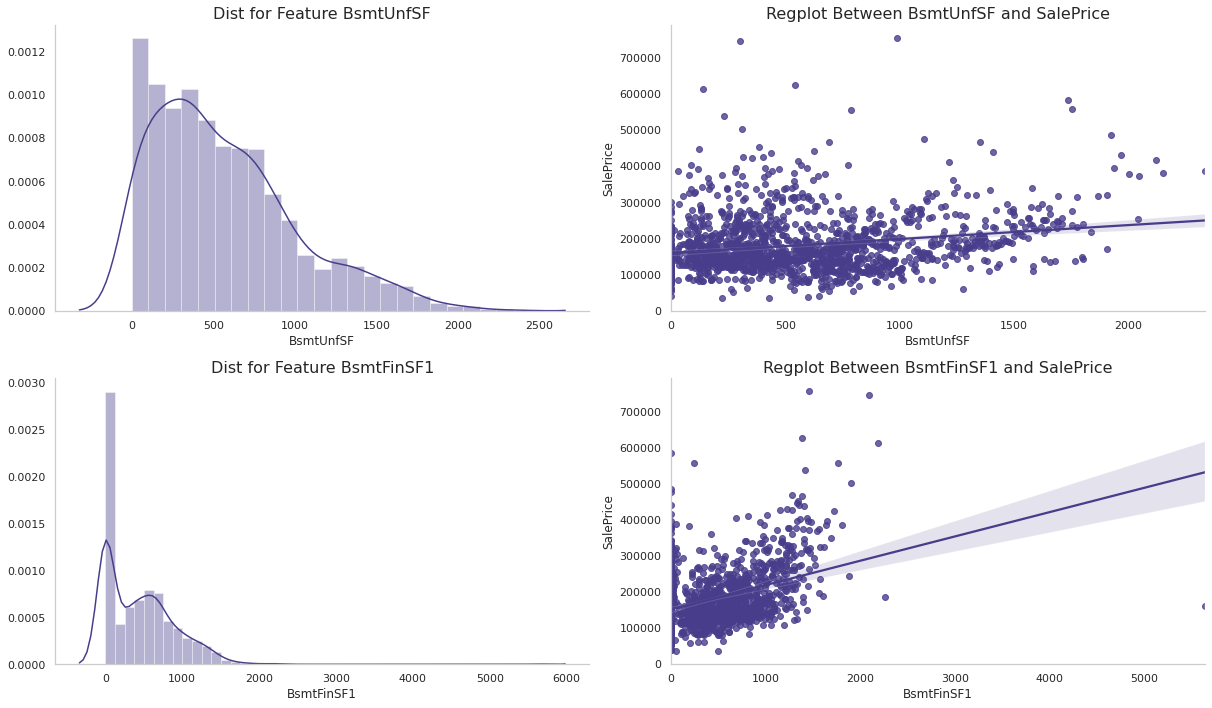

In [21]:
plot_multiple_dist_scatterplot(df=df, col_list=['BsmtUnfSF', 'BsmtFinSF1'], y_col='SalePrice')

The figure above shows a relationship of two variables related to the basement, which are:

* **_BsmtUnfSF_**: Basement area without finishing;
* **_BsmtFinSF1_**: Area covered by type 1 finish (BsmtFinType1 attribute)

Crossing the distribution analysis with the target variable (`SalePrice`), it is possible to see the effect of the` BsmtFinSF1` feature on the general price of the property. In theory, this indicates that the larger the area of application of a particular finish (defined here simply as "type 1", the more expensive the home tends to be.

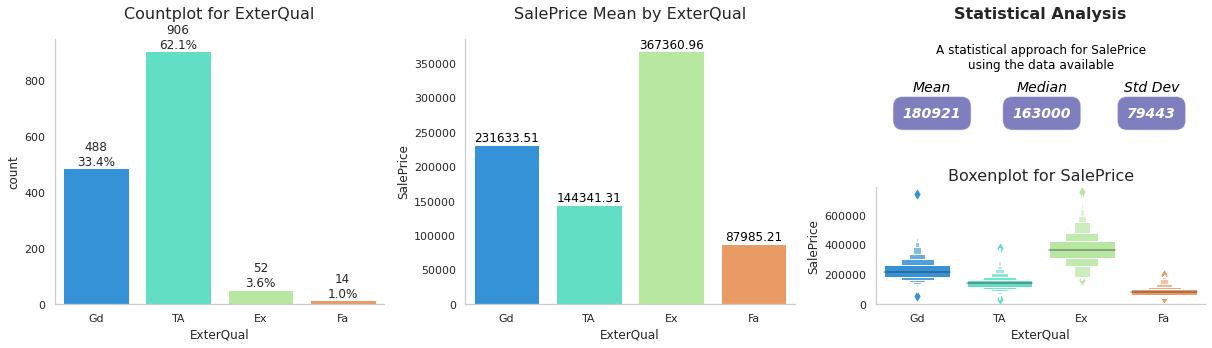

In [22]:
plot_cat_aggreg_report(df=df, cat_col='ExterQual', value_col=TARGET, dist_kind='boxen')

In the plot above, an analysis is made on the external quality of the property as a way to simulate its respective price. Although we have a majority of properties registered with the qualities `Gd` (good) and` TA`, properties with external quality of the type `Ex` (excellent) have the highest average value.

This type of trend is repeated for the other categorical quality variables that, in a way, discretize the level of some sectors of the property (or the property itself), as are the cases of the `KitchenQual` and` GarageQual` features, plotted below .

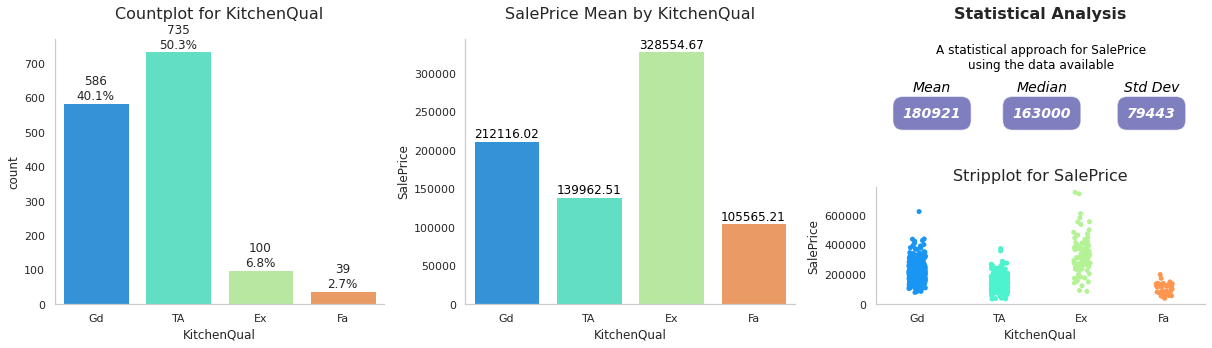

In [23]:
plot_cat_aggreg_report(df=df, cat_col='KitchenQual', value_col=TARGET, dist_kind='strip')

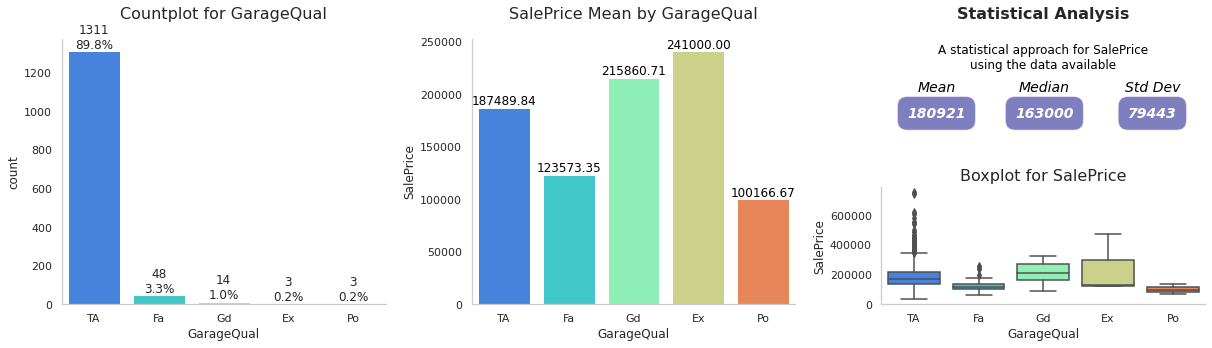

In [24]:
plot_cat_aggreg_report(df=df, cat_col='GarageQual', value_col=TARGET, dist_kind='box')

<a id="2.4"></a>
<font color="dimgrey" size=+2.0><b>2.4 Analysis of Location Features</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Finally, ending the exploratory session of the database, we will analyze the last block of variables related to the location of the property. Composed of only 4 features, this is an extremely small group. Its variables basically indicate some issue related to the geographical area of the property.

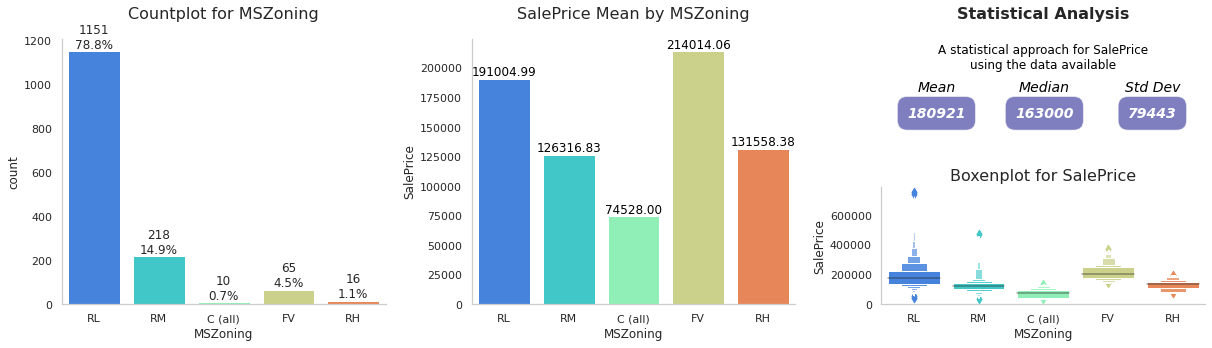

In [25]:
location_cols = ['MSZoning', 'Neighborhood', 'Condition1', 'Condition2']

plot_cat_aggreg_report(df=df, cat_col='MSZoning', value_col=TARGET, dist_kind='boxen')

Thus, ending the exploratory analysis, we have an aggregated and statistical relationship with the variable `MSZoning`, being possible to observe how this variable impacts on the final price of the property. Next, we will start studies related to the final preparation of the base.

<a id="3"></a>
<font color="darkslateblue" size=+2.5><b>3. Prep: Building Pipelines</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

<a id="3.1"></a>
<font color="dimgrey" size=+2.0><b>3.1 Initial Pipeline</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

At first, it will be proposed to build an initial pipeline containing classes applied throughout the database. The purpose of this pipeline is to apply common transformations to the gross base received, in addition to facilitating the initial pruning of the features present in the base.

<a id="3.1.1"></a>
<font color="dimgrey" size=+1.0><b>3.1.1 Initial Drop</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

The first step to be taken in the data preparation phase involves the feature selection process. Not all columns present in the database are relevant to the training objective of the predictive model. In this step, a column filtering process will be performed from the `ColumnSelection()` class of the `mlcomposer.transformers` module.

In terms of objective, the `Condition2` and` RoofMatl` columns of the original base will initially be eliminated because, in a way, they are columns that bring an extremely uneven amount of volume in their categorical columns. The graph below shows a volumetric view of these two columns, thus exemplifying the reasons that made us decide for their exclusions.

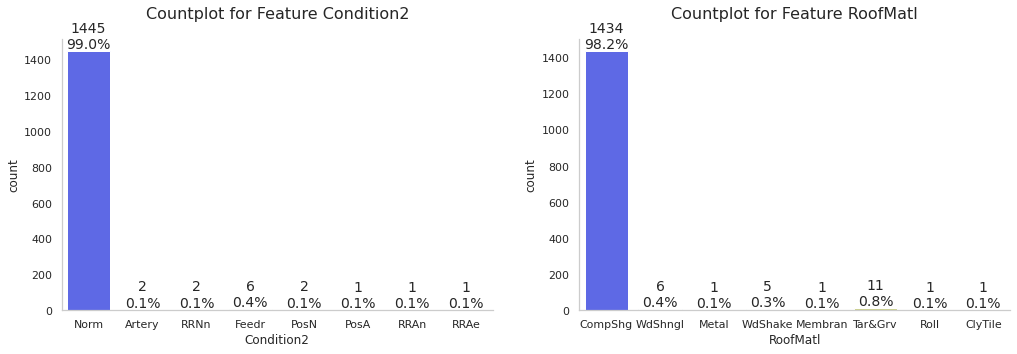

In [26]:
# Looking at features to be dropped
TO_DROP = ['Condition2', 'RoofMatl']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))
plot_countplot(df=df, col='Condition2', ax=axs[0])
plot_countplot(df=df, col='RoofMatl', ax=axs[1])

Through the graphs above, it can be seen that the columns `Condition2` and` RoofMatl` are practically composed of unique values, that is, more than 98% of their entries belong to a single categorical value. Because they are practically constant, these variables have no value for a possible predictive model and, therefore, can be eliminated from the initial basis.

In [27]:
# Importing modile class
from mlcomposer.transformers import ColumnSelection

# Creating a copy of original DataFrame
df_tmp = df.copy()

# Initial parameters for feature selection
TARGET = 'SalePrice'
TO_DROP = ['Condition2', 'RoofMatl', 'Id']
INITIAL_FEATURES = [col for col in df_tmp.columns if col not in TO_DROP]

# Applying feature selection from class object
selector = ColumnSelection(features=INITIAL_FEATURES)
df_slct = selector.fit_transform(df_tmp)

# Results
print(f'Shape before feature selection: {df_tmp.shape}')
print(f'Shape after feature selection: {df_slct.shape}')

Shape before feature selection: (1460, 81)
Shape after feature selection: (1460, 78)


By executing the `fit_transform()` method of the `ColumnSelection()` class, it is possible to notice the elimination of the two previously defined columns.

<a id="3.1.2"></a>
<font color="dimgrey" size=+1.0><b>3.1.2 Categorical Grouping</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

A common fact to datasets with a large number of columns is the presence of categorical features with several different entries. It is known that categorical variables must, at some point in the preparation pipeline, go through an encoding process, which is responsible for the distribution of categorical entries in columns.

In a scenario of variables with many inputs, it is possible to find inconsistency of features after the application of `encoding`, especially in cases of variables with some extremely unrepresentative entrances (as in the example of the` Condition2` and `RoofMatl` variables analyzed above) .

For this, we will separate some categorical variables that fit this scenario of many different entries and apply the class `CategoricalLimitter()` of the package `mlcomposer` to group minorities.

In [28]:
# Importing module class
from mlcomposer.transformers import CategoricalLimitter
from sklearn.pipeline import Pipeline

# Defining categorical features to be grouped
N_CAT = 5
HIGH_CAT_FEATURES = data_overview(df=df_tmp).query('qtd_cat > @N_CAT + 1')['feature'].values
HIGH_CAT_FEATURES = [col for col in HIGH_CAT_FEATURES if col not in TO_DROP]
CAT3_FEATURES = ['Functional', 'SaleType']
CAT8_FEATURES = ['Neighborhood']
CAT5_FEATURES = ['HouseStyle', 'Condition1', 'Exterior2nd', 'Exterior1st']
OTHER_TAG = 'Other'

# Applying categorical grouping
cat3_agrup = CategoricalLimitter(features=CAT3_FEATURES, n_cat=3, other_tag=OTHER_TAG)
cat5_agrup = CategoricalLimitter(features=CAT5_FEATURES, n_cat=5, other_tag=OTHER_TAG)
cat8_agrup = CategoricalLimitter(features=CAT8_FEATURES, n_cat=8, other_tag=OTHER_TAG)
cat_agrup_pipeline = Pipeline([
    ('cat3_agrup', cat3_agrup),
    ('cat5_agrup', cat5_agrup),
    ('cat8_agrup', cat8_agrup)
])

df_cat_agrup = cat_agrup_pipeline.fit_transform(df_slct)

To validate the successful execution of the categorical grouping class, we will analyze, through `countplots()`, the scenario of entries different from the set of variables defined by the object `HIGH_CAT_FEATURES` **before** and **after** of class application.

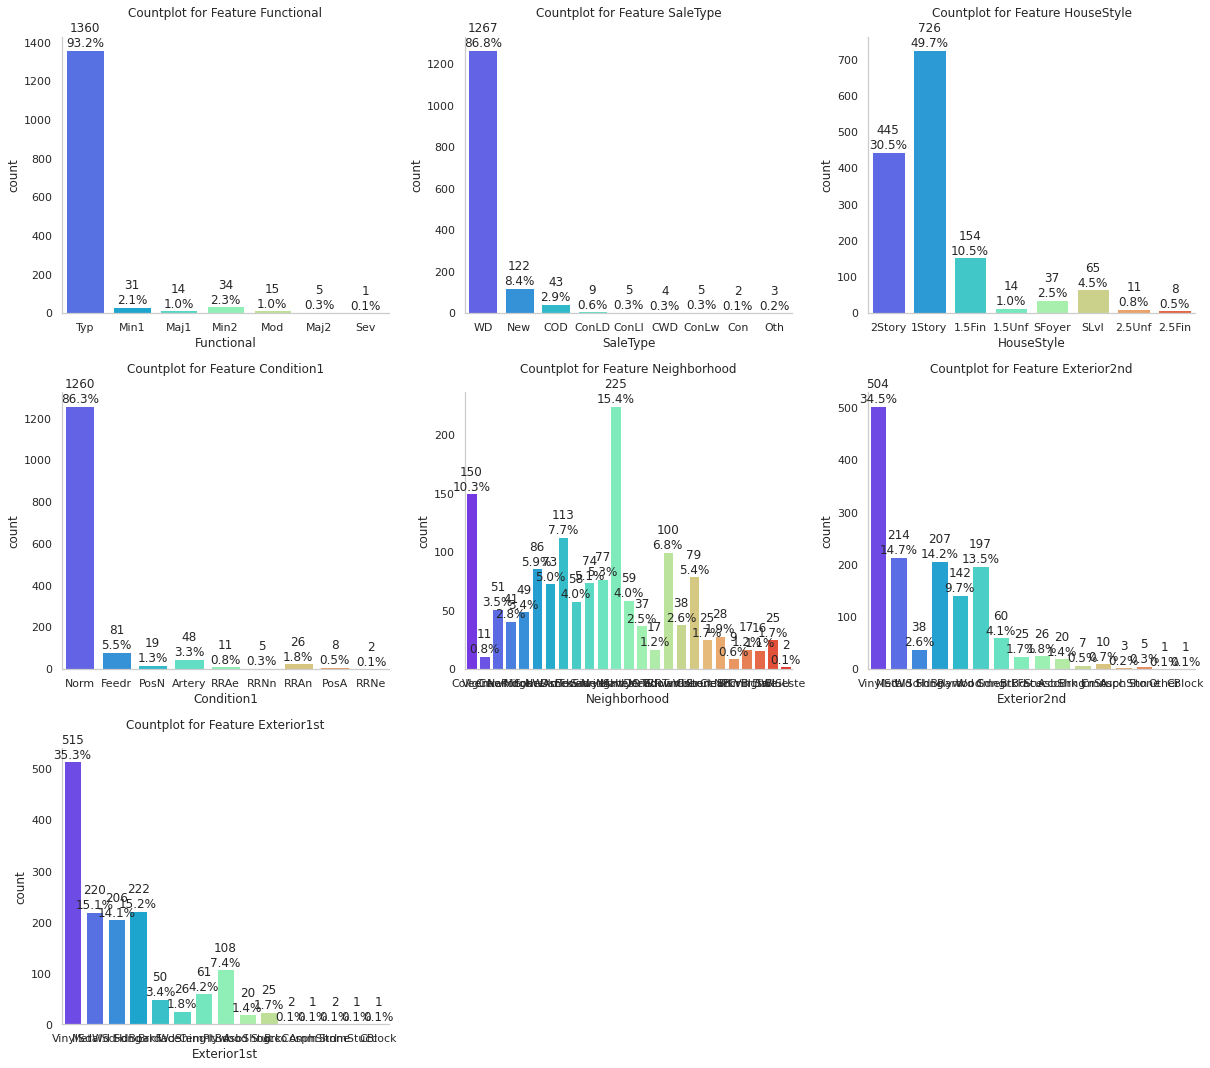

In [29]:
# Countplot for features with a high number of categories
plot_multiple_countplots(df=df_tmp, col_list=HIGH_CAT_FEATURES)

After the application of the class, we have:

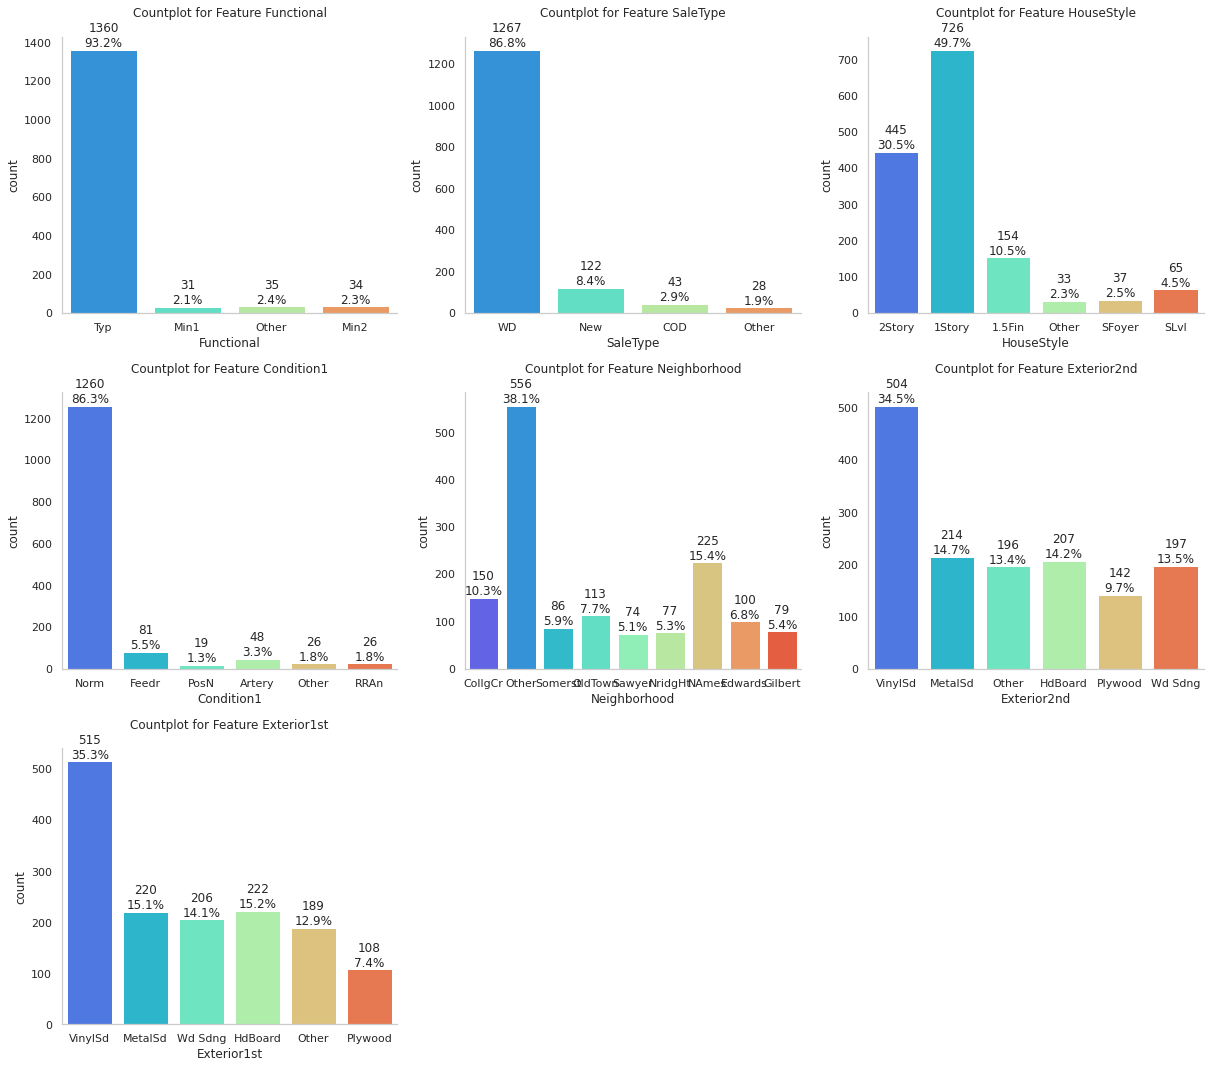

In [30]:
# Countplot after categorical grouping
plot_multiple_countplots(df=df_cat_agrup, col_list=HIGH_CAT_FEATURES)

<a id="3.1.3"></a>
<font color="dimgrey" size=+1.0><b>3.1.3 Duplicated Data</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

The handling of duplicate data is an important step in preparing the basis for model training. This is because eliminating duplicates also means eliminating redundancy at the base, allowing machine learning models a faster convergence to local / global minimums.

To accomplish this task, the class DuplicatesDimplicates of the module pycomp.ml.transformers will be used, which, in turn, is responsible for simply eliminating duplicate records from a database passed as input.

In [31]:
# Importing class
from mlcomposer.transformers import DropDuplicates

# Applying transformer
dup_dropper = DropDuplicates()
df_nodup = dup_dropper.fit_transform(df_cat_agrup)

# Results
print(f'Total of duplicates before: {df_cat_agrup.duplicated().sum()}')
print(f'Total of duplicates after: {df_nodup.duplicated().sum()}')

Total of duplicates before: 0
Total of duplicates after: 0


<a id="3.1.4"></a>
<font color="dimgrey" size=+1.0><b>3.1.4 Target Log Transformation</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In the proposed business problem, we need to predict property prices given their characteristics. In order for us to build a good predictive model in this regression task, it is possible to apply some transformation techniques so that the models can achieve better results. One of these techniques is the logarithmic transformation in the target variable and its advantages can be seen at [link](https://gdcoder.com/when-why-to-use-log-transformation-in-regression/)

In practice, applying the logarithm to the target variable of a database works well when that variable has an asymmetric distribution on the left, indicating the presence of possible outliers. If these outliers are important for the model, without the possibility of being eliminated, the logarithmic transformation helps predictive models (mainly those based on trees) to achieve better results. Next, we will investigate the current distribution of our target variable `SalePrice` and build a transformer to apply the logarithm, if applicable.

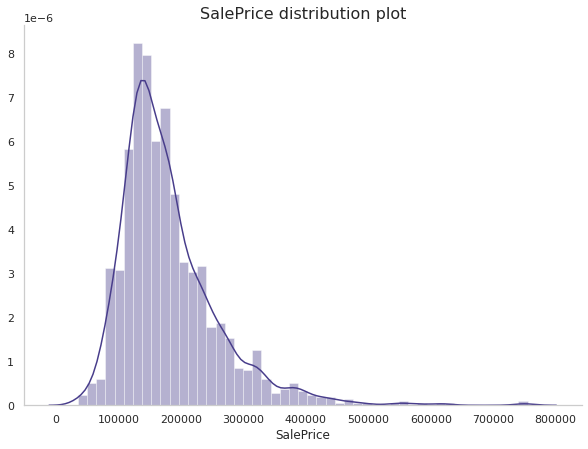

In [32]:
# SalePrice distribution
plot_distplot(df=df, col=TARGET, hist=True, title=f'{TARGET} distribution plot')

It seems the case where the logarithmic transformation would be of great help for predictive models. The current distribution of `SalePrice` is asymmetric on the left and, thus, the transformation would make the values (mainly the outliers) more interpretable for the models. We will use the `LogTransformation` class to transform the database and compare the two scenarios

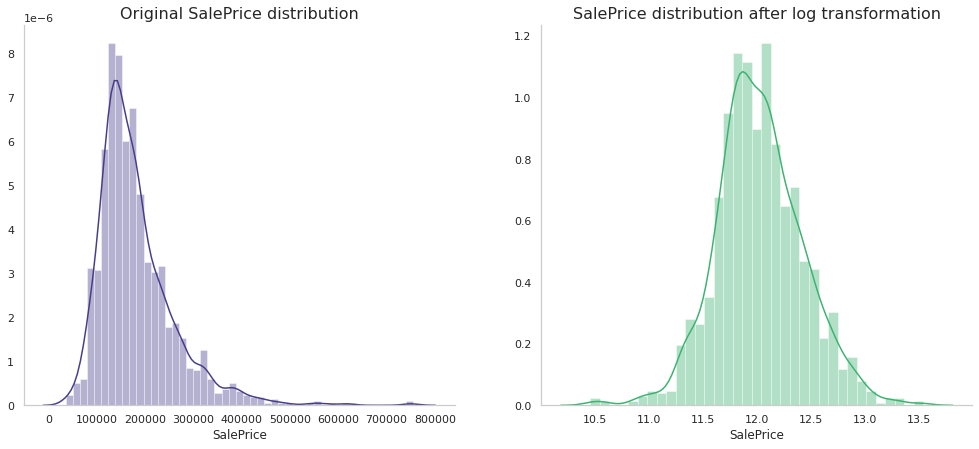

In [33]:
# Importing class
from mlcomposer.transformers import LogTransformation

# Comparing distributions
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))
plot_distplot(df=df, col=TARGET, hist=True, ax=axs[0], title=f'Original {TARGET} distribution')

# Creating object and applying transformation
log_tr = LogTransformation(cols_to_log=TARGET)
df_target_log = log_tr.fit_transform(df)

# Plotting distribution after transformation
plot_distplot(df=df_target_log, col=TARGET, hist=True, color='mediumseagreen', ax=axs[1],
              title=f'{TARGET} distribution after log transformation')

<a id="3.1.5"></a>
<font color="dimgrey" size=+1.0><b>3.1.5 Training and Validation Data</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Finishing what we could call the initial pipeline of the project, we have an important step responsible for separating the database in training and testing. Thinking about a future modeling step, evaluating the result on different bases is extremely important to make decisions regarding the best practical solution to be put into production.

For this, we will use the SplitDados class also from the pycomp.ml.transformers module, which, in turn, applies this separation in the base and returns us with properly separated training and validation data.

In [34]:
# Importing class
from mlcomposer.transformers import DataSplitter

# Applying transformer
splitter = DataSplitter(target=TARGET)
X_train, X_test, y_train, y_test = splitter.fit_transform(df_nodup)

# Results
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (1168, 77)
Shape of X_test: (292, 77)
Shape of y_train: (1168,)
Shape of y_test: (292,)


Thus, it is possible to build a `Pipeline` that consolidates all these steps in a single transformer block, which is later used to apply the transformation steps sequentially in new received databases. The block below creates and executes a pipeline that applies the feature selection, categorical grouping and data separation processes in _training_ and _testing_.

<a id="3.1.5"></a>
<font color="dimgrey" size=+1.0><b>3.1.5 Building an Initial Pipeline</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In [35]:
# Building an initial pipeline
from sklearn.pipeline import Pipeline

tmp_pipeline = Pipeline([
    ('selector', ColumnSelection(features=INITIAL_FEATURES)),
    ('cat_agrup', Pipeline([
        ('cat3_agrup', CategoricalLimitter(features=CAT3_FEATURES, n_cat=3, other_tag=OTHER_TAG)),
        ('cat5_agrup', CategoricalLimitter(features=CAT5_FEATURES, n_cat=5, other_tag=OTHER_TAG)),
        ('cat8_agrup', CategoricalLimitter(features=CAT8_FEATURES, n_cat=8, other_tag=OTHER_TAG))
    ])),
    ('splitter', DataSplitter(target=TARGET))
])

# Applying this pipeline into the original data
X_train, X_test, y_train, y_test = tmp_pipeline.fit_transform(df)
print(f'Shape of original dataset: {df.shape}')
print(f'Shape of X_train: {X_train.shape}')

Shape of original dataset: (1460, 81)
Shape of X_train: (1168, 77)


However, it is extremely important to note that, due to the nature of the `CategoricalLimitter()` class, the less representative entries are automatically grouped into a new entry defined by the` OTHER_TAG` variable. Thus, it is possible to realize that, considering new databases received, the same volume and proportions will not always be the same for the categorical entries of the columns defined in `HIGH_CAT_FEATURES`. In other words, according to the database passed as input, it is possible to obtain different sets of features, since the volumes vary from set to set.

For example, it is possible that, considering a fictitious "A" base, the entry "TAG 1" (also fictitious) may have a highly representative volumetry, being considered as a relevant entry by the class `CategoricalLimitter()` which, in turn, takes into account the ordered result obtained by the `value_counts()` method. On the other hand, on a fictitious "B" basis, that same "TAG 1" entry can have a very low volume and, thus, it will be automatically grouped within the entry defined by `OTHER_TAG` and, consequently, remaining out of the set end, thus causing an error when using that base in subsequent steps.

To mitigate this problem, it is possible to "fix" the categorical entries considered in the initial group within each feature of the base. Simply put, a dictionary is created with the list of entries for each column, which is used for an official and definitive transformation in any database, thus ensuring that the same categorical entries will be considered, in the same way as the same categorical entries. Representative variables will be grouped in the `OTHER_TAG` variable.

In [36]:
# Dictionary with columns and entries
high_cat_dict = {}
for feature in HIGH_CAT_FEATURES:
    high_cat_dict[feature] = [col for col in X_train[feature].value_counts().index if col != OTHER_TAG]
high_cat_dict

{'Functional': ['Typ', 'Min2', 'Min1'],
 'SaleType': ['WD', 'New', 'COD'],
 'HouseStyle': ['1Story', '2Story', '1.5Fin', 'SLvl', 'SFoyer'],
 'Condition1': ['Norm', 'Feedr', 'Artery', 'RRAn', 'PosN'],
 'Neighborhood': ['NAmes',
  'CollgCr',
  'OldTown',
  'Edwards',
  'Somerst',
  'Gilbert',
  'NridgHt',
  'Sawyer'],
 'Exterior2nd': ['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'Plywood'],
 'Exterior1st': ['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood']}

After building a definitive dictionary of categorical entries of the variables present in `HIGH_CAT_FEATURES`, it is possible to build a new definitive pipeline considering this categorical cluster transformer instead of the transformer used previously.

In [37]:
# Importing class module
from mlcomposer.transformers import CategoricalMapper

# Building a definitive initial pipeline
initial_pipeline = Pipeline([
    ('selector', ColumnSelection(features=INITIAL_FEATURES)),
    ('cat_agrup', CategoricalMapper(cat_dict=high_cat_dict, other_tag=OTHER_TAG)),
    ('splitter', DataSplitter(target=TARGET))
])

# Applying this pipeline into the original data
X_train, X_test, y_train, y_test = initial_pipeline.fit_transform(df)
print(f'Shape of original dataset: {df.shape}')
print(f'Shape of X_train: {X_train.shape}')

Shape of original dataset: (1460, 81)
Shape of X_train: (1168, 77)


Verifying if the result with this new pipeline is the same as we tested before

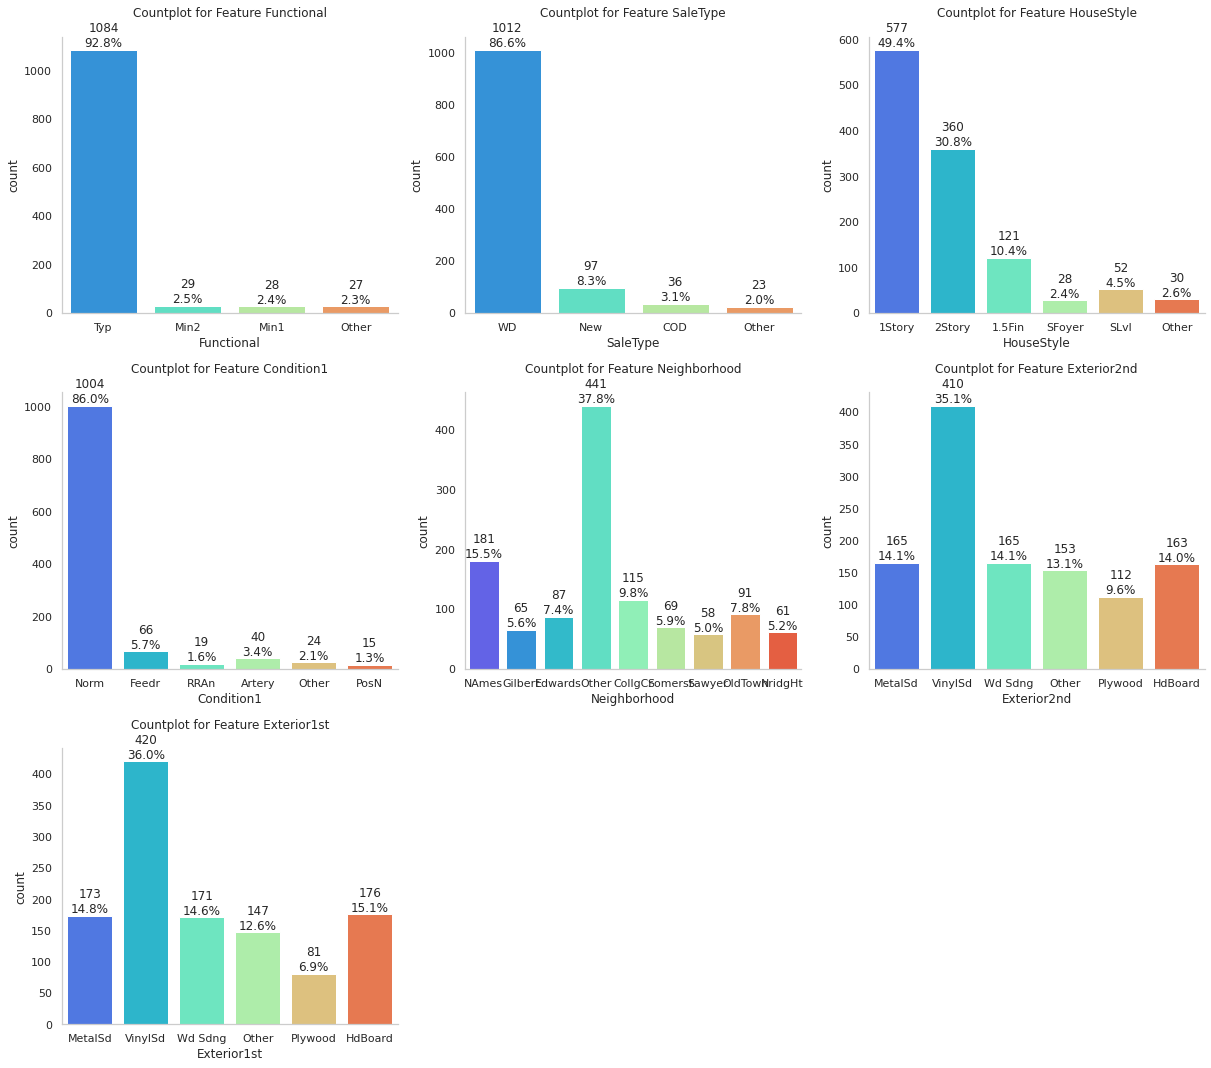

In [38]:
# Verificando resultados do pipeline initial definitivo
plot_multiple_countplots(df=X_train, col_list=HIGH_CAT_FEATURES)

<a id="3.2"></a>
<font color="dimgrey" size=+2.0><b>3.2 Numerical Pipeline</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

After building an initial pipeline capable of receiving a raw database, applying a feature selection process, performing a categorical grouping procedure and, finally, separating the data in training and testing, we will use the resulting training base to build pipelines in two different ways:

* **Numerical pipeline:** preparation of the numerical data contained in the database;
* **Categorical pipeline:** preparation of categorical data contained in the database.

In [39]:
# Splitting features by dtype
num_features = [col for col, dtype in X_train.dtypes.items() if dtype != 'object']
cat_features = [col for col, dtype in X_train.dtypes.items() if dtype == 'object']

# Splitting datasets
X_train_num = X_train[num_features]
X_cat_num = X_train[cat_features]

print(f'Total of numerical features: {len(num_features)}')
print(f'Total of categorical features: {len(cat_features)}')
print(f'Total of features (must be sum of numerical and categorical ones): {X_train.shape[1]}')

Total of numerical features: 36
Total of categorical features: 41
Total of features (must be sum of numerical and categorical ones): 77


<a id="3.2.1"></a>
<font color="dimgrey" size=+1.0><b>3.2.1 Null Data</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

We saw, throughout the exploratory analysis, that many columns of the available set had null data. This is an important factor that needs to be considered in the preparation stage. Returning to this subject, we will then see again the numeric features with null data present

In [40]:
df_overview.query('feature in @num_features').head()

feature  qtd_null  pct_null    dtype  qtd_cat  target_pearson_corr
5    LotFrontage       259  0.177397  float64        0             0.351799
6    GarageYrBlt        81  0.055479  float64        0             0.486362
16    MasVnrArea         8  0.005479  float64        0             0.477493
21    Fireplaces         0  0.000000    int64        0             0.466929
23  KitchenAbvGr         0  0.000000    int64        0            -0.135907

Thus, it is possible to notice that the variables `LotFrontage`,`GarageYrBlt` and `MasVnrArea` have null data in different quantities. The meanings of these three columns are:

* **_LotFrontage_**: Dimension of the front perimeter of the house;
* **_GarageYrBlt_**: Year of construction of the garage;
* **_MasVnrArea_**: Area covered by masonry

As we have different meanings for these columns, it is possible to establish different strategies for the final decision in terms of handling these null data. From the description above (and also from previous analyzes), it is noted that the feature `GarageYrBlt`, in its essence, has a discreet meaning, evidencing the year of construction of one of the parts of the property. Filling this variable with `average` or` median` does not seem entirely correct. For the other features (`LotFrontage` and `MasVnrArea`), it seems to make sense to use some statistical parameter to fill in the null values. Thus, we will adopt the following approach:

1. Fill in null data of the variable `GarageYrBlt` with some "numeric wildcard" (-999 or 0, for example);
2. Fill in null data for the variables `LotFrontage` and` MasVnrArea` with the respective medians.

___

_Obs:_ after performing some tests in this approach of filling in nulls, a modification in the topic above will be proposed, thus creating a unique pipeline of data transformation by the `median` in both columns.

In [41]:
# Importing library
from sklearn.impute import SimpleImputer

# Creating object and filling null data with median
imputer = SimpleImputer(strategy='median')
X_train_num_filled = imputer.fit_transform(X_train_num)

# Results
print(f'Null data before pipeline: {X_train_num.isnull().sum().sum()}')
print(f'Null data after pipeline: {pd.DataFrame(X_train_num_filled, columns=num_features).isnull().sum().sum()}')

Null data before pipeline: 287
Null data after pipeline: 0


<a id="3.2.2"></a>
<font color="dimgrey" size=+1.0><b>3.2.2 Features Log Transformation</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In session 2 of EDA, we saw some distributions of numerical variables amid the proposed analyzes. In them, it was possible to perceive the presence of distribution with great differences for what could be considered a "normal Gaussian distribution". In terms of convergence of regression models, greater performance and speed in reaching the minimum cost of the function through features with distributions close to the normal distribution.

Thus, we will optionally propose a step in the pipeline that applies a logarithmic transformation to the numerical features present in the base. With this, we can validate whether the final performance of the model is sensitive to this type of transformation.

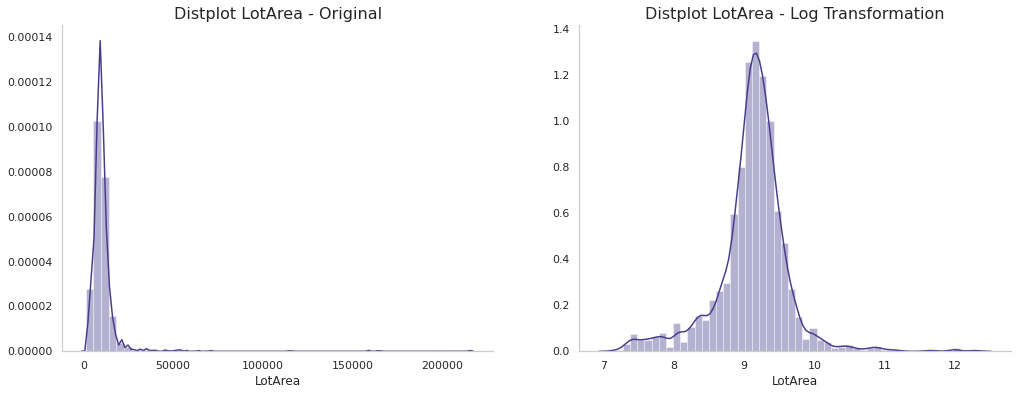

In [42]:
# Example
col_log = 'LotArea'
tmp = df.copy()
tmp[col_log] = np.log1p(tmp[col_log])

# Comparing distributions
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 6))
plot_distplot(df=df, col=col_log, hist=True, ax=axs[0], title=f'Distplot {col_log} - Original')
plot_distplot(df=tmp, col=col_log, hist=True, ax=axs[1], title=f'Distplot {col_log} - Log Transformation')

Two highly relevant statistical measures for distribution analysis are `skew` and` kurtosis`. Through the [link](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa) it is possible to have a clear idea on what each of these measures is and how to interpret continuous distributions through their values.

As seen in `3.1.4`, the logarithmic transformation helps to increase performance for distributions with positive skewness (asymmetric on the left). Thus, we will analyze the numerical features again and rank the main features with the opportunity for improvement through this type of transformation.

In [43]:
from scipy.stats import skew, kurtosis

tmp_ov = df_overview.copy()
tmp_ov['skew'] = tmp_ov.query('feature in @num_features')['feature'].apply(lambda x: skew(X_train_num[x]))
tmp_ov['kurtosis'] = tmp_ov.query('feature in @num_features')['feature'].apply(lambda x: kurtosis(X_train_num[x]))
tmp_ov[~tmp_ov['skew'].isnull()].sort_values(by='skew', ascending=False).loc[:, ['feature', 'skew', 'kurtosis']]

feature       skew    kurtosis
39        MiscVal  22.025247  563.929400
38       PoolArea  14.377604  210.141782
60        LotArea  11.942726  185.641772
36      3SsnPorch   9.821277  111.307077
46   LowQualFinSF   9.187637   86.746826
23   KitchenAbvGr   4.439345   21.498685
65     BsmtFinSF2   4.212476   18.888096
37    ScreenPorch   4.085138   18.421274
27   BsmtHalfBath   4.000640   15.040928
35  EnclosedPorch   3.159881   10.989620
34    OpenPorchSF   2.328895    8.113594
72     BsmtFinSF1   1.859740   13.412634
70    TotalBsmtSF   1.721666   15.605627
33     WoodDeckSF   1.585291    3.098141
68     MSSubClass   1.436955    1.685960
30      GrLivArea   1.423308    5.423131
66       1stFlrSF   1.420335    6.666281
71      BsmtUnfSF   0.909458    0.394508
64       2ndFlrSF   0.800180   -0.572501
62    OverallCond   0.732238    1.225792
28   TotRmsAbvGrd   0.686453    0.933125
25       HalfBath   0.650459   -1.172184
21     Fireplaces   0.636707   -0.233010
44   BsmtFullBath   0.611246   -0.755269
24   BedroomAbvGr   0.289510    2.519269
40         MoSold   0.241450   -0.374763
48    OverallQual   0.196322    0.113783
31     GarageArea   0.108970    0.870502
41         YrSold   0.082486   -1.187154
26       FullBath   0.038120   -0.907589
29     GarageCars  -0.389231    0.328282
63   YearRemodAdd  -0.507414   -1.279329
55      YearBuilt  -0.622603   -0.438251

The table above shows a list of features through their skewness and kurtosis measures of symmetry. In the code block below, we will execute the `DynamicLogTransformation` class, which, in turn, has the role of applying the logarithmic transformation in a database in a preparation pipeline. The advantage of this class is the previous definition of a list of features to which the transformation will be applied, which is defined by the user.

In [44]:
# Importando classe
from mlcomposer.transformers import DynamicLogTransformation

# Definições iniciais da transformação
SKEW_THRESH = 0.5
cols_idx = [np.argwhere(skew(X_train_num)==sk)[0][0] for sk in skew(X_train_num) if sk > SKEW_THRESH]
cols_to_log = list(X_train_num.iloc[:, cols_idx].columns)

print(f'First line before transformation: \n\n{X_train_num_filled[0]}')
# Aplicando transformação
log_tr = DynamicLogTransformation(num_features=num_features, cols_to_log=cols_to_log)
X_train_num_log = log_tr.fit_transform(X_train_num_filled)

# Validando
print(f'\nFirst line after transformation: \n\n{X_train_num_log[0]}')

First line before transformation: 

[2.000e+01 7.000e+01 8.400e+03 5.000e+00 6.000e+00 1.957e+03 1.957e+03
 0.000e+00 9.220e+02 0.000e+00 3.920e+02 1.314e+03 1.314e+03 0.000e+00
 0.000e+00 1.314e+03 1.000e+00 0.000e+00 1.000e+00 0.000e+00 3.000e+00
 1.000e+00 5.000e+00 0.000e+00 1.957e+03 1.000e+00 2.940e+02 2.500e+02
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 6.000e+00
 2.010e+03]

First line after transformation: 

[3.04452244e+00 7.00000000e+01 9.03610603e+00 5.00000000e+00
 1.94591015e+00 1.95700000e+03 1.95700000e+03 0.00000000e+00
 6.82762923e+00 0.00000000e+00 5.97380961e+00 7.18159194e+00
 7.18159194e+00 0.00000000e+00 0.00000000e+00 7.18159194e+00
 6.93147181e-01 0.00000000e+00 1.00000000e+00 0.00000000e+00
 3.00000000e+00 6.93147181e-01 1.79175947e+00 0.00000000e+00
 1.95700000e+03 1.00000000e+00 2.94000000e+02 5.52545294e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.00000000e+00 2.01000000e+03]


<a id="3.2.3"></a>
<font color="dimgrey" size=+1.0><b>3.2.3 Scaling</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Another interesting way to apply a procedure that helps a given predictive model to converge to the optimal value more quickly is given by the “normalization” of the data. For the machine learning context, it is possible to use ready-made sklearn classes, for example, `MinMaxScaler` or `StandardScaler`.

This type of standardization / normalization can optionally be applied directly to the numerical pipeline. Below, an example of how this transformation can be applied to our numerical database will be demonstrated.

In [45]:
# Importing class
from sklearn.preprocessing import StandardScaler
from mlcomposer.transformers import DynamicScaler

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_features)
X_train_num_scaled.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0   -0.866764    -0.013818 -0.212896    -0.820445     0.372217  -0.455469   
1    0.074110    -0.455871 -0.265245    -0.088934     1.268609   0.718609   
2   -0.631546    -0.134378 -0.177841    -0.820445     1.268609  -1.988293   
3   -0.161109    -0.415684 -0.324474    -0.820445     1.268609  -1.107734   
4   -0.161109    -0.817550 -0.529035    -0.820445     0.372217  -1.531707   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
0     -1.346063   -0.599984    1.037269   -0.285504  ...   -0.863837   
1      0.439214   -0.599984   -0.971996   -0.285504  ...   -0.456264   
2     -1.683818   -0.599984   -0.971996   -0.285504  ...   -2.257169   
3     -1.683818    0.857019    0.267995   -0.285504  ...   -1.119755   
4     -1.683818   -0.599984   -0.496920   -0.285504  ...   -0.797488   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0    1.188402    -0.714352      -0.351921  -0.121008    -0.275838 -0.070993   
1   -0.740157    -0.138015      -0.351921  -0.121008    -0.275838 -0.070993   
2    1.790113    -0.714352       2.290826  -0.121008    -0.275838 -0.070993   
3   -0.740157    -0.714352       3.902257  -0.121008    -0.275838 -0.070993   
4   -0.740157    -0.714352       3.547742  -0.121008    -0.275838 -0.070993   

   MiscVal    MoSold    YrSold  
0 -0.09274 -0.133417  1.650065  
1 -0.09274 -0.508010  0.893677  
2 -0.09274 -0.508010  0.137290  
3 -0.09274 -0.133417 -0.619098  
4 -0.09274 -0.508010  1.650065  

[5 rows x 36 columns]

Some models are sensitive to the normalization of the input data and others, not so much. Thus, we will propose the construction of an additional class with the possibility of applying or not the normalization.

<a id="3.2.4"></a>
<font color="dimgrey" size=+1.0><b>3.2.4 Building a Numerical Pipeline</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

After presenting the possible steps to be used to transform the numerical variables in our database, we will build a pipeline to encapsulate all of these procedures in a single block.

In [46]:
# Building pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('log', DynamicLogTransformation(num_features=num_features, cols_to_log=cols_to_log)),
    ('scaler', DynamicScaler(scaler_type='Standard'))
])

# Applying pipeline
X_train_num_prep = num_pipeline.fit_transform(X_train_num)

# Results
print(f'Shape before num_pipeline: {X_train_num.shape}')
print(f'Shape after num_pipeline:{X_train_num_prep.shape}')
print(f'\nX_train_num[0]:\n{np.array(X_train_num.iloc[0, :])}')
print(f'\nX_train_num_prep[0]:\n{X_train_num_prep[0]}')

Shape before num_pipeline: (1168, 36)
Shape after num_pipeline:(1168, 36)

X_train_num[0]:
[2.000e+01 7.000e+01 8.400e+03 5.000e+00 6.000e+00 1.957e+03 1.957e+03
 0.000e+00 9.220e+02 0.000e+00 3.920e+02 1.314e+03 1.314e+03 0.000e+00
 0.000e+00 1.314e+03 1.000e+00 0.000e+00 1.000e+00 0.000e+00 3.000e+00
 1.000e+00 5.000e+00 0.000e+00 1.957e+03 1.000e+00 2.940e+02 2.500e+02
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 6.000e+00
 2.010e+03]

X_train_num_prep[0]:
[-1.11982716 -0.01246836 -0.16702565 -0.82044456  0.44682197 -0.45546896
 -1.34606303 -0.5978887   0.86528257 -0.35135664  0.17173796  0.37465015
  0.52687271 -0.8794683  -0.13411283 -0.29258426  1.14801583 -0.24407856
 -1.05556573 -0.77090108  0.13621832 -0.20804794 -0.98522474 -1.02190647
 -0.90440277 -1.05654384 -0.86383727  1.18457293 -1.09616853 -0.39512374
 -0.13167924 -0.29990108 -0.07183767 -0.19627377 -0.13341669  1.65006527]


<a id="3.3"></a>
<font color="dimgrey" size=+2.0><b>3.3 Categorical Pipeline</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Continuing with the base transformation step, we now have the mission of applying specific transformers within the categorical universe of the data set. Recalling a little about the main features existing in this world, the block below rescues some parameters extracted previously:

In [47]:
print(f'Total of categorical features: {len(cat_features)}')
print(f'Example of categorical training data:')
X_train_cat = X_train[cat_features]
X_train_cat.head()

Total of categorical features: 41
Example of categorical training data:


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
254        RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1066       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
638        RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
799        RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
380        RL   Pave  Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1  ... GarageType GarageFinish GarageQual  \
254         NAmes       Norm  ...     Attchd          RFn         TA   
1066      Gilbert       Norm  ...     Attchd          RFn         TA   
638       Edwards      Feedr  ...        NaN          NaN        NaN   
799         Other      Feedr  ...     Detchd          Unf         TA   
380         Other       Norm  ...     Detchd          Unf         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
254          TA          Y    NaN    NaN         NaN       WD        Normal  
1066         TA          Y    NaN    NaN         NaN       WD        Normal  
638         NaN          P    NaN  MnPrv         NaN       WD        Normal  
799          TA          Y    NaN  MnPrv         NaN       WD        Normal  
380          TA          Y    NaN    NaN         NaN       WD        Normal  

[5 rows x 41 columns]

Before planning the steps of this pipeline, let's view some parameters extracted in the `data_overview()` function in relation to the categorical variables in our database:

In [48]:
cat_overview = data_overview(df=X_train_cat)
cat_overview.head(10)

feature  qtd_null  pct_null   dtype  qtd_cat
0        PoolQC      1162  0.994863  object        3
1   MiscFeature      1122  0.960616  object        4
2         Alley      1094  0.936644  object        2
3         Fence       935  0.800514  object        4
4   FireplaceQu       547  0.468322  object        5
5    GarageType        64  0.054795  object        6
6    GarageCond        64  0.054795  object        5
7    GarageQual        64  0.054795  object        5
8  GarageFinish        64  0.054795  object        3
9  BsmtExposure        28  0.023973  object        4

We see that, right away, there is a big problem involving null data in our categorical database. the `PoolQC`,` MiscFeature`, `Alley` and` Fence` columns, for example, have more than 80% of null records in the context of the data. Thus, an assertive decision needs to be made to prevent this from becoming a negative bias within the training of the proposed predictive model.

An alternative for the treatment of these data is the application of the `DummiesEncoding` class present in the `mlcomposer` package, mindful of the configuration to consider null data as a different category. In this way, the meaning of the null data is not lost or generalized (it would not be desirable to fill 99% of the data in `PoolQC` with the most common entry, for example).

<a id="3.3.1"></a>
<font color="dimgrey" size=+1.0><b>3.3.1 Dummies Encoding</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In [49]:
# Importing class
from mlcomposer.transformers import DummiesEncoding

# Creating object and pplying encoding
encoder = DummiesEncoding(dummy_na=True)
X_train_cat_encoded = encoder.fit_transform(X_train_cat)

# Results
print(f'Shape before encoding: {X_train_cat.shape}')
print(f'Shape after encoding: {X_train_cat_encoded.shape}')
X_train_cat_encoded.head()

Shape before encoding: (1168, 41)
Shape after encoding: (1168, 228)


MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
254                  0            0            0            1            0   
1066                 0            0            0            1            0   
638                  0            0            0            1            0   
799                  0            0            0            1            0   
380                  0            0            0            1            0   

      MSZoning_nan  Street_Grvl  Street_Pave  Street_nan  Alley_Grvl  ...  \
254              0            0            1           0           0  ...   
1066             0            0            1           0           0  ...   
638              0            0            1           0           0  ...   
799              0            0            1           0           0  ...   
380              0            0            1           0           0  ...   

      SaleType_Other  SaleType_WD  SaleType_nan  SaleCondition_Abnorml  \
254                0            1             0                      0   
1066               0            1             0                      0   
638                0            1             0                      0   
799                0            1             0                      0   
380                0            1             0                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
254                       0                     0                     0   
1066                      0                     0                     0   
638                       0                     0                     0   
799                       0                     0                     0   
380                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  SaleCondition_nan  
254                      1                      0                  0  
1066                     1                      0                  0  
638                      1                      0                  0  
799                      1                      0                  0  
380                      1                      0                  0  

[5 rows x 228 columns]

With the result of the application of the encoding method, it is possible to notice a significant growth in the number of features present in our database. This was due to the large number of categorical variables present, each contributing a reasonable number of entries. When applying the `DummiesEncoding` class, each categorical entry is pivoted at the base and transformed into a different new column (example: `MsZoning_C (all)`,` MSZoning_FV`, `MSZonin_RH`, among others).

At first, the application of this process solves the problem of meaning and representativeness of null data (check new columns with suffix `_nan` in the resulting base), however, the increase in features can make predictive training more difficult, promoting a longer processing delay and a likely underperforming performance. To mitigate this fact, it is possible to analyze the training results and validate the application of feature selection processes based on the importance of the features after the training.

<a id="3.3.2"></a>
<font color="dimgrey" size=+1.0><b>3.3.2 Building a Categorical Pipeline</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In this defined business context, the only transformer present in the categorical part of the base is `DummiesEncoding` and, thus, we can then build a pipeline that consolidates this class within a macro block. This will facilitate the union of categorical and numerical pipelines in the future.

In [50]:
# Building pipeline
cat_pipeline = Pipeline([
    ('encoder', DummiesEncoding(dummy_na=True))
])

# Applying pipeline
X_train_cat_encoded = cat_pipeline.fit_transform(X_train_cat)

# Results
print(f'Shape before cat_pipeline: {X_train_cat.shape}')
print(f'Shape after cat_pipeline: {X_train_cat_encoded.shape}')

Shape before cat_pipeline: (1168, 41)
Shape after cat_pipeline: (1168, 228)


<a id="3.4"></a>
<font color="dimgrey" size=+2.0><b>3.4 Complete Pipelines</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

After the proposals defined above within the base preparation stage, it is time to resume the blocks built and consolidate the definitive pipelines for the listed transformations. Thus, our goal is to define the fixed variables in each block and, finally, to build preparation objects that include:

- **initial_train_pipeline:** initial pipeline to be applied in the _training_ stage of a received raw database;
- **intial_pred_pipeline:** initial pipeline to be applied in the step of anchoring a raw database received;
- **prep_pipeline:** pipeline for preparing a database in order to consolidate:
     - *num_pipeline:* numerical preparation pipeline;
     - *cat_pipeline:* categorical preparation pipeline

In [51]:
# Project variables
TARGET = 'SalePrice'
TO_DROP = ['Condition2', 'RoofMatl', 'Id']
INITIAL_FEATURES = [col for col in df_tmp.columns if col not in TO_DROP]
CAT_GROUP_DICT = {'Functional': ['Typ', 'Min2', 'Min1'],
                  'SaleType': ['WD', 'New', 'COD'],
                  'HouseStyle': ['1Story', '2Story', '1.5Fin', 'SLvl', 'SFoyer'],
                  'Condition1': ['Norm', 'Feedr', 'Artery', 'RRAn', 'PosN'],
                  'Neighborhood': ['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert', 'NridgHt', 'Sawyer'],
                  'Exterior2nd': ['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'Plywood'],
                  'Exterior1st': ['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood']}
OTHER_TAG = 'Other'
COLS_TO_LOG = ['MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
               'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
               'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

# Splitting features by its dtype
NUM_FEATURES = [col for col, dtype in X_train.dtypes.items() if dtype != 'object']
CAT_FEATURES = [col for col, dtype in X_train.dtypes.items() if dtype == 'object']

In [52]:
# Importing libraries
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Initial prep pipeline
initial_prep_pipeline = Pipeline([
    ('col_filter', ColumnSelection(features=INITIAL_FEATURES)),
    ('cat_agrup', CategoricalMapper(cat_dict=CAT_GROUP_DICT, other_tag=OTHER_TAG)),
    ('log_target', LogTransformation(cols_to_log=TARGET))
])

# Numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('log', DynamicLogTransformation(num_features=NUM_FEATURES, cols_to_log=COLS_TO_LOG)),
    ('scaler', DynamicScaler(scaler_type=None))
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ('encoder', DummiesEncoding(dummy_na=True))
])

# Preparation pipeline
prep_pipeline = ColumnTransformer([
    ('num', num_pipeline, NUM_FEATURES),
    ('cat', cat_pipeline, CAT_FEATURES)
])

In [53]:
# Reading raw data
df_train = pd.read_csv(os.path.join(DATA_PATH, TRAIN_FILENAME))

# Applying initial pipeline
df_train_prep = initial_prep_pipeline.fit_transform(df_train)

# Creating training and validation data
X_train, X_val, y_train, y_val = train_test_split(df_train_prep.drop(TARGET, axis=1), 
                                                  df_train_prep[TARGET].values, test_size=.20, random_state=42)

# Applying prep pipeline (train)
X_train_prep = prep_pipeline.fit_transform(X_train)
train_features = prep_pipeline.named_transformers_['cat'].named_steps['encoder'].features_after_encoding

# Applying prep pipeline (validation)
X_val_prep = prep_pipeline.fit_transform(X_val)
val_features = prep_pipeline.named_transformers_['cat'].named_steps['encoder'].features_after_encoding

# Results
print(f'Shape of X_train_prep: {X_train_prep.shape}')
print(f'Shape of X_val_prep: {X_val_prep.shape}')

Shape of X_train_prep: (1168, 264)
Shape of X_val_prep: (292, 245)


Warning! The total of features present in the training dataset is different from the total of features present in the test dataset. This will certainly be a problem when trying to run a future predictive model in `X_test_prep`, which will be trained in `X_train_prep`. Errors will arise.

What could explain this difference in the number of columns? The answer lies in the process of encoding categorical variables. Basically, the main suspicion is that the `X_test` test base does not contain the same categorical entries as `X_train`, so that, when applying the encoding process, the pivot for those missing entries does not exist and, therefore, the final number of pivot columns after encoding the test data is different.

Proposing a solution to this problem, the variables resulting from the encoding process in each case were stored in the `train_features` and `test_features` objects. With them, it is possible to compare exactly which were the categorical entries present in `X_train` and nonexistent in `X_test` (although rarer due to the volume, the opposite situation may also exist).

In [54]:
# Verifying
print(f'Total of train_features (after encoding): {len(train_features)}')
print(f'Total of val_features (after encoding): {len(val_features)}')
print(f'Difference between train and test: {len(train_features) - len(val_features)}')

# Features not included on validation data
not_included_val = [col for col in train_features if col not in val_features]
print(f'\nCategorical entries included on X_train but not in X_val:')
not_included_val

Total of train_features (after encoding): 228
Total of val_features (after encoding): 209
Difference between train and test: 19

Categorical entries included on X_train but not in X_val:


['Utilities_NoSeWa',
 'RoofStyle_Shed',
 'ExterCond_Ex',
 'ExterCond_Po',
 'Foundation_Wood',
 'Heating_Floor',
 'Heating_OthW',
 'Heating_Wall',
 'HeatingQC_Po',
 'Electrical_FuseP',
 'GarageType_2Types',
 'GarageQual_Ex',
 'GarageCond_Ex',
 'GarageCond_Gd',
 'PoolQC_Ex',
 'PoolQC_Fa',
 'MiscFeature_Gar2',
 'MiscFeature_Othr',
 'MiscFeature_TenC',
 'SaleCondition_AdjLand']

Well, the blocks above indicate that, after the encoding process, some variables were left out of both sets (training and testing). In this case, it is necessary to perform an alignment step of the sets before starting the modeling steps. Thinking about scoring new entry bases, it is possible to consider a final step in the pipeline to, in fact, exactly match the features of the set before consuming the model.

In [55]:
# Returning final set of features that will be considered on training
X_train_prep_df = pd.DataFrame(X_train_prep, columns=num_features+train_features)
MODEL_FEATURES = list(X_train_prep_df.columns)
    
# Filling non existing features on validation data with zeros (0)
X_val_prep_df = pd.DataFrame(X_val_prep, columns=num_features+val_features)
for col in not_included_val:
    X_val_prep_df[col] = 0
X_val_prep = np.array(X_val_prep_df.loc[:, MODEL_FEATURES])

# Results
print(f'Shape of new X_train_prep: {X_train_prep.shape}')
print(f'Shape of new X_val_prep: {X_val_prep.shape}')

Shape of new X_train_prep: (1168, 264)
Shape of new X_val_prep: (292, 264)


Another important factor to be carried out before the transformation of the sets is the alignment of the features in their respective positions. For the predictive model, it would be disastrous to analyze the result in the test data considering an array of the same dimensions but with features in different positions. For this, we will align and order the columns correctly, based on the training set.

In [56]:
# Validating data
print(f'Total of model features: {len(MODEL_FEATURES)}')

# Ordering X_val
X_val_prep_df = X_val_prep_df.loc[:, MODEL_FEATURES]

# Looking at the last features for each set
print(f'\nLast 5 features of X_train_prep: \n{X_train_prep_df.iloc[:, -5:].columns}')
print(f'\nLast 5 features of X_val_prep: \n{X_val_prep_df.iloc[:, -5:].columns}')

# Transforming into an array
X_train_prep = np.array(X_train_prep_df)
X_val_prep = np.array(X_val_prep_df)

# Results
print(f'\nShape of final X_train_prep: {X_train_prep.shape}')
print(f'Shape of final X_val_prep: {X_val_prep.shape}')

Total of model features: 264

Last 5 features of X_train_prep: 
Index(['SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'SaleCondition_nan'],
      dtype='object')

Last 5 features of X_val_prep: 
Index(['SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'SaleCondition_nan'],
      dtype='object')

Shape of final X_train_prep: (1168, 264)
Shape of final X_val_prep: (292, 264)


With this final step of aligning the data set to create a single, definitive and orderly set according to all available features, it is possible to add an additional step in the pipeline to take care of this transformation automatically. This pipeline has the objective of applying the preparatory steps defined previously and, at the end, checking if the resulting features are in accordance with the `MODEL_FEATURES` block containing the definitive list of variables to be returned after the pipeline. For each of the features that are not present in this block, new columns will be inserted and, later, ordered in order to generate sets faithful to those used in the training steps.

Such a step will be proposed after training the modeling phase. The pilot and tests will be carried out on the official test basis for this business problem.

<a id="4"></a>
<font color="darkslateblue" size=+2.5><b>4: Modeling: Training Predictive Models</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

After a long journey in the stage of preparing the available data, the great time has come to collect all the results obtained and conduct training on predictive models to, in fact, build an intelligence capable of receiving some inputs or characteristics of real estate and, in the end, predict the value of houses in a generic way.

In this step, we will use the features of the `mlcomposer` package within the `mlcomposer.trainer` module so that, in an easy, fast, efficient and intuitive way, we can train and evaluate predictive models from the most diverse sources within this task **Linear Regression**.

<a id="4.1"></a>
<font color="dimgrey" size=+2.0><b>4.1 Structuring Variables</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In this step, the objective is to import the regressors and prepare the structure that will be used within the `LinearRegressor` class of the `mlcomposer` package. Thus, the cells below will be responsible for instantiating the models and preparing the search space for the best hyperparameters of the model

In [57]:
# Importing regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Creating objects
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor()
forest_reg = RandomForestRegressor()
ridge_reg = Ridge()
lasso_reg = Lasso()
elastic_reg = ElasticNet()
lgbm_reg = LGBMRegressor(objective='regression')
xgb_reg = XGBRegressor(objective='reg:squarederror')
#catb_reg = CatBoostRegressor()

In [58]:
# Defining hyperparameters
lin_reg_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

tree_reg_params = {
    'max_depth': [100, 200, 300, 350, 400, 500],
    'max_features': np.arange(1, len(MODEL_FEATURES)),
    'random_state': [42]
}

forest_reg_params = {
    'n_estimators': [75, 90, 100, 200, 300, 400, 450, 500], 
    'max_features': np.arange(1, len(MODEL_FEATURES)),
    'random_state': [42]
}

ridge_reg_params = {
    'alpha': np.linspace(1e-5, 20, 400),
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

lasso_reg_params = {
    'alpha': np.linspace(1e-5, 20, 400),
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

elastic_reg_params = {
    'alpha': np.linspace(1e-5, 20, 400),
    'l1_ratio': np.linspace(0, 1, 400),
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

lgbm_param_grid = {
    'num_leaves': np.arange(10, 250, 1),
    'max_depth': np.arange(10, 350, 1),
    'n_estimators': [75, 90, 100, 200, 300, 400, 450, 500],
    'learning_rate': np.linspace(1e-5, 20, 400),
    'reg_alpha': np.linspace(1e-5, 20, 400),
    'reg_lambda': np.linspace(1e-5, 20, 400)
}

xgb_param_grid = {
    'reg_lambda': np.linspace(1e-5, 20, 400),
    'reg_alpha': np.linspace(1e-5, 20, 400),
    'max_depth': np.arange(10, 350, 1),
    'n_estimators': [75, 90, 100, 200, 300, 400, 450, 500],
    'random_state': [42]
}

In [59]:
# Creating set of regressors to be trained and evaluated
set_regressors = {
    'LinearRegression': {
        'model': lin_reg,
        'params': lin_reg_params
    },
    'DecisionTreeRegressor': {
        'model': tree_reg,
        'params': tree_reg_params
    },
    'RandomForestRegressor': {
        'model': forest_reg,
        'params': forest_reg_params
    },
    'Ridge': {
        'model': ridge_reg,
        'params': ridge_reg_params
    },
    'Lasso': {
        'model': lasso_reg,
        'params': lasso_reg_params
    },
    'ElasticNet': {
        'model': elastic_reg,
        'params': elastic_reg_params
    },
    'LightGBM': {
        'model': lgbm_reg,
        'params': {}
    },
    'XGBoost': {
        'model': xgb_reg,
        'params': {}
    }
}

<a id="4.2"></a>
<font color="dimgrey" size=+2.0><b>4.2 Training Models</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Once the modeling structure has been prepared from specific objects, such as the `set_regressors` dictionary, it is now possible to import the `RegressorLinear` class present in the `pycomp.ml.trainer` module to carry out all training and evaluation of the candidate models.

This class was developed in order to greatly facilitate the work of the analyst / scientist in terms of implementing codes to train, evaluate and optimize predictive models of linear regression. Its methods include powerful features that perform various actions with just one call.

In [60]:
# Importing class
from mlcomposer.trainer import LinearRegressor

# Creating object and training models
trainer = LinearRegressor()
trainer.fit(set_regressors, X_train_prep, y_train, random_search=True, scoring='neg_mean_squared_error')

DEBUG;2021-05-12 01:04:28;trainer.py;trainer;2924;Training model LinearRegression
DEBUG;2021-05-12 01:04:28;trainer.py;trainer;2944;Applying RandomizedSearchCV
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.0s finished
DEBUG;2021-05-12 01:04:30;trainer.py;trainer;2924;Training model DecisionTreeRegressor
DEBUG;2021-05-12 01:04:30;trainer.py;trainer;2944;Applying RandomizedSearchCV
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished
DEBUG;2021-05-12 01:04:30;trainer.py;trainer;2924;Training model RandomForestRegressor
DEBUG;2021-05-12 01:04:30;trainer.py;trainer;2944;Applying RandomizedSearchCV
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished
DEBUG;2021-05-12 01:05:52;trainer.py;trainer;2924;Training model Ridg

The `fit()` method of the `trainer` object created is responsible for training the models encapsulated in the `set_regressors` dictionary created in the initial definitions stage.

By configuring the method to also apply the process of `RandomizedSearchCV` (random search of the best hyperparameters of each algorithm), it is possible to build models optimized according to the search space passed in the dictionary` set_regressors`.

<a id="4.3"></a>
<font color="dimgrey" size=+2.0><b>4.3 Evaluating Performance</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Once the candidate models are trained through the `fit()` method, it is then possible to evaluate the performance obtained in each case, thus returning the main regression metrics capable of indicating the best direction for the given task.

To perform this process, we can use the `evaluate_performance()` or `plot_metrics()` methods of the `trainer` object. In the first case, the return is an analytical DataFrame containing the result of the evaluation of each model against the main metrics. In the second case, the return is a visual analysis of the metrics for each of the models.

In [61]:
# Evaluating performance
metrics = trainer.evaluate_performance(X_train_prep, y_train, X_val_prep, y_val)
metrics

DEBUG;2021-05-12 01:06:01;trainer.py;trainer;2997;Computing metrics on LinearRegression using cross validation with 5 K-folds
INFO;2021-05-12 01:06:02;trainer.py;trainer;3017;Sucessfully computed metrics on training data in 0.451 seconds
DEBUG;2021-05-12 01:06:02;trainer.py;trainer;3050;Computing metrics on LinearRegression using validation data
INFO;2021-05-12 01:06:02;trainer.py;trainer;3072;Sucesfully computed metrics using validation data for LinearRegression on 0.002 seconds
DEBUG;2021-05-12 01:06:02;trainer.py;trainer;2997;Computing metrics on DecisionTreeRegressor using cross validation with 5 K-folds
INFO;2021-05-12 01:06:03;trainer.py;trainer;3017;Sucessfully computed metrics on training data in 0.606 seconds
DEBUG;2021-05-12 01:06:03;trainer.py;trainer;3050;Computing metrics on DecisionTreeRegressor using validation data
INFO;2021-05-12 01:06:03;trainer.py;trainer;3072;Sucesfully computed metrics using validation data for DecisionTreeRegressor on 0.002 seconds
DEBUG;2021-05-1

model          approach    mae    mse   rmse     r2  \
0        LinearRegression  Treino 5 K-folds  0.096  0.043  0.188  0.713   
1        LinearRegression    Validation set  0.092  0.019  0.139  0.896   
2   DecisionTreeRegressor  Treino 5 K-folds  0.151  0.044  0.210  0.704   
3   DecisionTreeRegressor    Validation set  0.143  0.042  0.204  0.777   
4   RandomForestRegressor  Treino 5 K-folds  0.094  0.020  0.140  0.870   
5   RandomForestRegressor    Validation set  0.096  0.021  0.145  0.887   
6                   Ridge  Treino 5 K-folds  0.091  0.019  0.137  0.876   
7                   Ridge    Validation set  0.095  0.019  0.139  0.896   
8                   Lasso  Treino 5 K-folds  0.195  0.068  0.261  0.550   
9                   Lasso    Validation set  0.206  0.085  0.291  0.547   
10             ElasticNet  Treino 5 K-folds  0.165  0.053  0.229  0.652   
11             ElasticNet    Validation set  0.171  0.057  0.238  0.697   
12               LightGBM  Treino 5 K-folds  0.091  0.018  0.134  0.882   
13               LightGBM    Validation set  0.093  0.019  0.139  0.896   
14                XGBoost  Treino 5 K-folds  0.097  0.020  0.141  0.869   
15                XGBoost    Validation set  0.104  0.026  0.162  0.860   

    total_time         anomesdia_datetime  
0        0.451 2021-05-12 01:07:59.055577  
1        0.002 2021-05-12 01:07:59.055577  
2        0.606 2021-05-12 01:07:59.055577  
3        0.002 2021-05-12 01:07:59.055577  
4      103.177 2021-05-12 01:07:59.055577  
5        0.075 2021-05-12 01:07:59.055577  
6        0.123 2021-05-12 01:07:59.055577  
7        0.002 2021-05-12 01:07:59.055577  
8        0.093 2021-05-12 01:07:59.055577  
9        0.003 2021-05-12 01:07:59.055577  
10       1.730 2021-05-12 01:07:59.055577  
11       0.004 2021-05-12 01:07:59.055577  
12       3.109 2021-05-12 01:07:59.055577  
13       0.005 2021-05-12 01:07:59.055577  
14       7.617 2021-05-12 01:07:59.055577  
15       0.007 2021-05-12 01:07:59.055577

We have the following metrics:
___
**MAE - Mean Absolute Error**

$\frac{1}{n}\sum|y-y_{pred}|$
___

**MSE - Mean Squared Error**

$\frac{1}{n}\sum\left(y-y_{pred}\right)²$
___

**RMSE - Root Mean Squared Error**

$\sqrt{\left(\frac{1}{n}\sum\left(y-y_{pred}\right)²\right)}$
___

**R2 Score**

$1 - \frac{\sum_{j=1}^n\left(y_{pred}-y_{true}\right)²}{\sum_{j=1}^n\left(y_j-y_{mean}\right)²}$
___

The return table allows us to compare the candidate regression models, thus making the decision on the best model for the given task to be guided by the optimization objective considered in the context. Visually, it is possible to execute the `plot_metrics()` method of the `trainer` object and see a more interactive comparison between the models.

DEBUG;2021-05-12 01:08:00;trainer.py;trainer;3417;Initializing plot for visual evaluation of regressors
DEBUG;2021-05-12 01:08:00;trainer.py;trainer;3421;Returning metrics through cross validation for LinearRegression
DEBUG;2021-05-12 01:08:00;trainer.py;trainer;3421;Returning metrics through cross validation for DecisionTreeRegressor
DEBUG;2021-05-12 01:08:01;trainer.py;trainer;3421;Returning metrics through cross validation for RandomForestRegressor
DEBUG;2021-05-12 01:09:45;trainer.py;trainer;3421;Returning metrics through cross validation for Ridge
DEBUG;2021-05-12 01:09:45;trainer.py;trainer;3421;Returning metrics through cross validation for Lasso
DEBUG;2021-05-12 01:09:45;trainer.py;trainer;3421;Returning metrics through cross validation for ElasticNet
DEBUG;2021-05-12 01:09:47;trainer.py;trainer;3421;Returning metrics through cross validation for LightGBM
DEBUG;2021-05-12 01:09:50;trainer.py;trainer;3421;Returning metrics through cross validation for XGBoost
DEBUG;2021-05-12 01

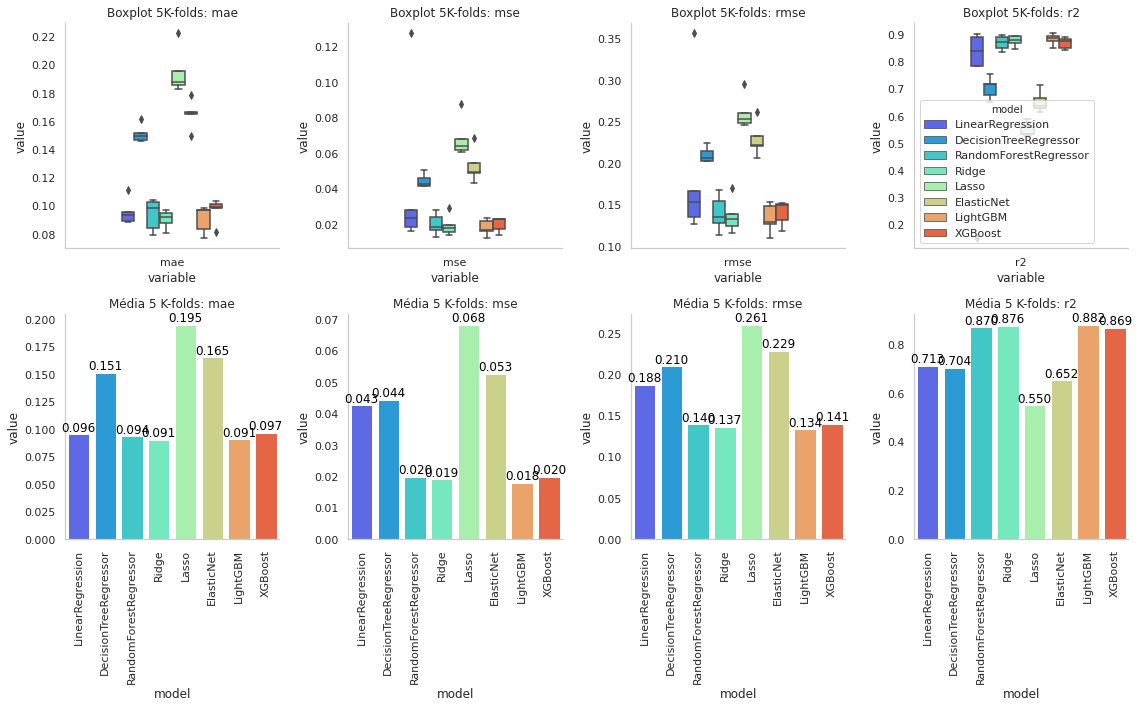

In [62]:
# Visual metrics comparison
trainer.plot_metrics(bar_label=True)

Here, it is possible to notice that, among the candidate models, the `RandomForestRegressor` presented the smallest errors for the MAE, MSE and RMSE metrics, in addition to a higher R² score. In the future, it is then possible to use this tree model for more specific optimizations or to consider different other models to verify possible better performances.

Once these metrics have been analyzed, it is then possible to propose more detailed analyzes of the data set, such as the most relevant features for the property price predictive model. Next, we will use the prepared base `X_train_prep` to plot a correlation matrix capable of showing us the variables with the greatest impact (directly or inversely proportional) in relation to the price of the properties.

<a id="4.4"></a>
<font color="dimgrey" size=+2.0><b>4.4 Correlation Matrix</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In this session, we will use the `plot_corr_matrix()` method of the `mlcomposer.insights` module. To execute it, just provide a database (`X_train_prep`) in DataFrame format and the target column of the correlation analysis. The result is a heatmap capable of scoring the main variables with an impact on the defined target, both directly (positive correlation) and inversely (negative correlation) proportional. We will then prepare the base and perform this function for both cases.

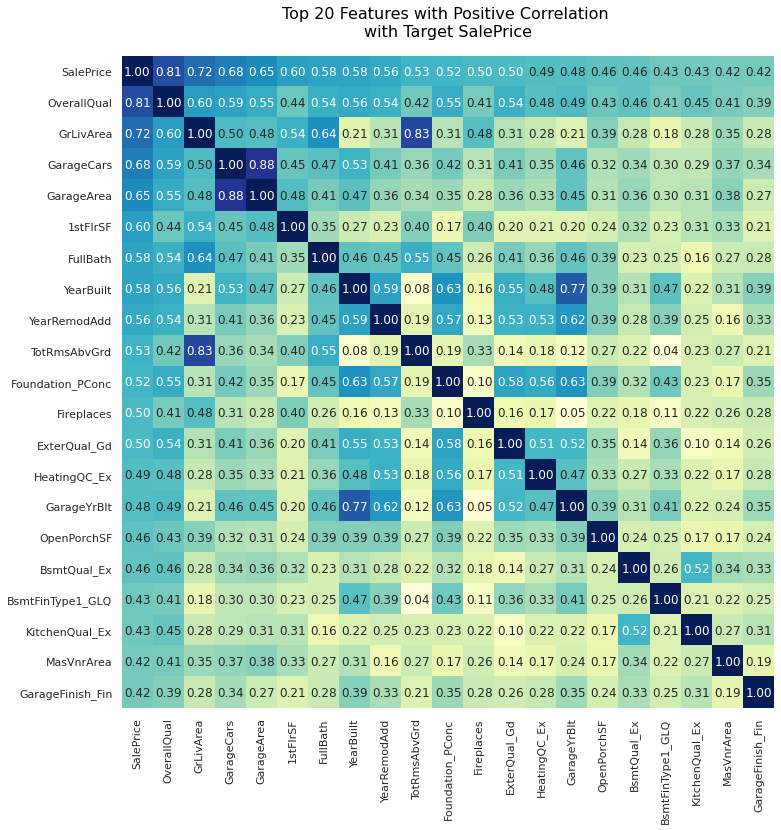

In [63]:
# Preparing DataFrame
X_df = pd.DataFrame(X_train_prep, columns=MODEL_FEATURES)
final_df = X_df.copy()
final_df[TARGET] = y_train

# Plotting correlation matrix (positive)
plot_corr_matrix(df=final_df, corr_col=TARGET, n_vars=20, figsize=(12, 12), cbar=False)

The matrix above shows us the 20 main variables with a positive correlation in relation to the target (`SalePrice`). Among them, it is possible to mention the great influence of `OverallQual`, `GrLivArea` and `GarageCars` in the price of real estate in a directly proportional relationship. In addition, it is possible to see a strong positive correlation point between the features `TotRmsAbvGrd` and `GrLivArea`, which can be analyzed in more detail in the future in a possible approach to eliminate redundancy of highly correlated features, allowing a possible gain in performance.

Next, we will analyze the matrix of the main variables with a negative correlation in relation to the target (inversely proportional relation).

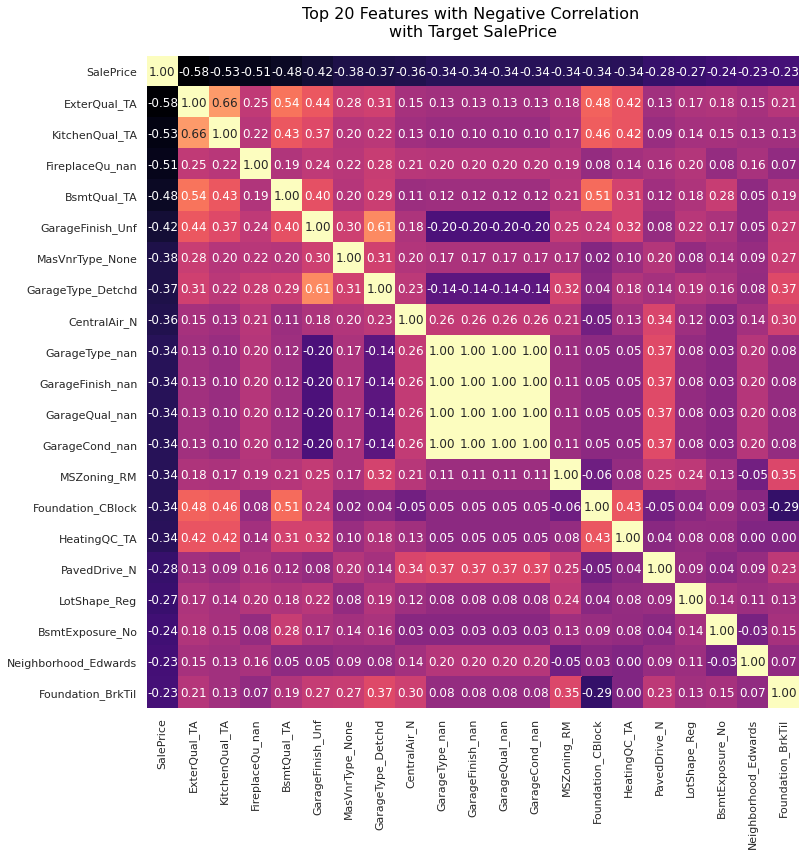

In [64]:
# Negative correlation
plot_corr_matrix(df=final_df, corr_col=TARGET, corr='negative', n_vars=20, figsize=(12, 12), cbar=False)

A matriz acima nos mostra as features com maior correlação negativa em relação ao preço de imóveis. É possível observar que grande parte dessas features estão atreladas a características categóricas das casas, como a inexistência de lareira (`FireplaceQu_nan`) ou a falta de acabamento em garagens (`GarageFinish_Unf`). Assim como na matriz anterior, é possível observar algumas variáveis com correlação máxima entre si, indicando assim uma redundância na modelagem. 

<a id="4.5"></a>
<font color="dimgrey" size=+2.0><b>4.5 Feature Importance</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Still within the context of evaluating the most relevant features in this modeling step, it is possible to use models already trained to extract this information. For this, we will execute the `plot_feature_importance()` method of the `trainer` object in order to graphically visualize the main features considered for each of the trained models (provided they have the` feature_importances_` method available).

DEBUG;2021-05-12 01:10:09;trainer.py;trainer;3331;Initializing feature importance visual analysis for the models
DEBUG;2021-05-12 01:10:09;trainer.py;trainer;3342;Extracting feature importance from LinearRegression
WARNING;2021-05-12 01:10:09;trainer.py;trainer;3346;LinearRegression does not have feature_importances_ method
DEBUG;2021-05-12 01:10:09;trainer.py;trainer;3342;Extracting feature importance from DecisionTreeRegressor
DEBUG;2021-05-12 01:10:09;trainer.py;trainer;3355;Plotting feature importances for DecisionTreeRegressor
INFO;2021-05-12 01:10:09;trainer.py;trainer;3365;Succesfully plotted feature importance analysis for DecisionTreeRegressor
DEBUG;2021-05-12 01:10:09;trainer.py;trainer;3342;Extracting feature importance from RandomForestRegressor
DEBUG;2021-05-12 01:10:09;trainer.py;trainer;3355;Plotting feature importances for RandomForestRegressor
INFO;2021-05-12 01:10:10;trainer.py;trainer;3365;Succesfully plotted feature importance analysis for RandomForestRegressor
DEBU

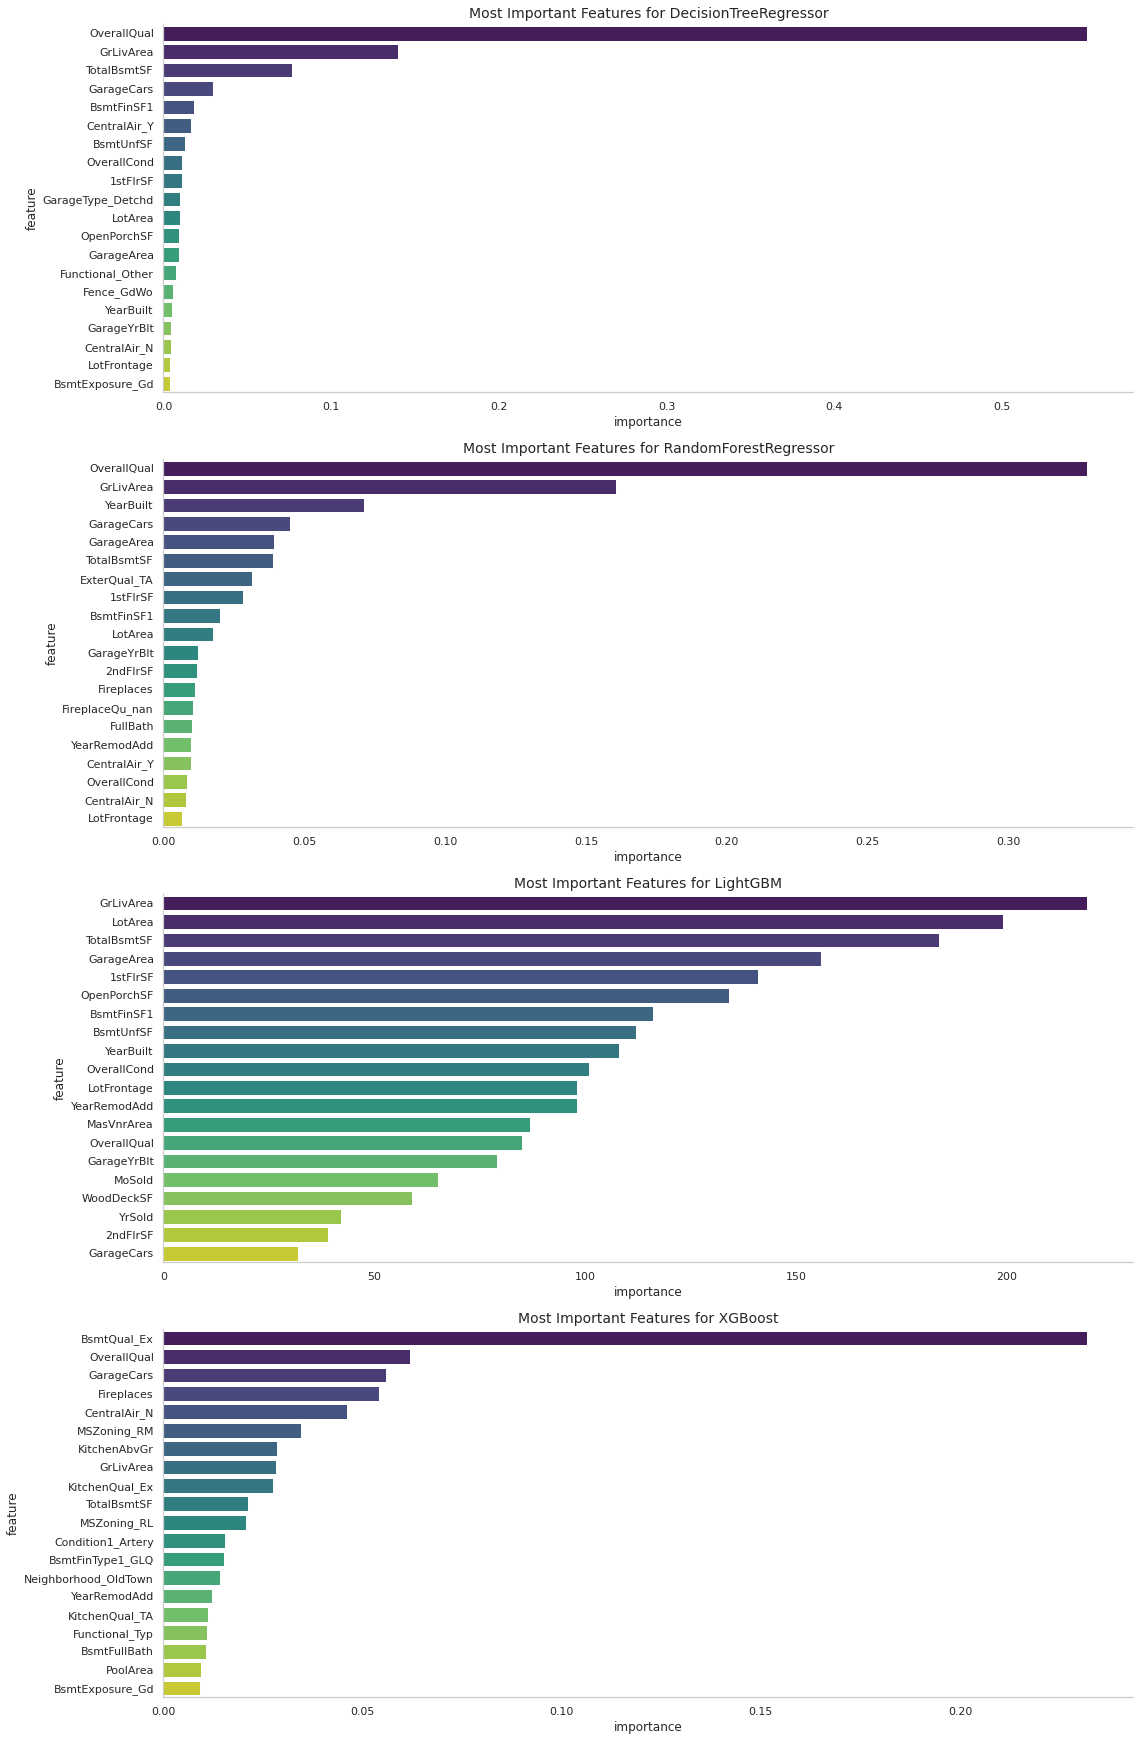

In [65]:
# Plotting feature importances
trainer.plot_feature_importance(features=MODEL_FEATURES)

Here it is possible to notice that the `RandomForestRegressor` and` DecisionTreeRegressor` models presented sets of features similar to the one seen in the positive correlation matrix. The other models considered do not have the `feature_importances_` method.

<a id="4.6"></a>
<font color="dimgrey" size=+2.0><b>4.6 Learning Curves</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

A great tool for identifying possible overfitting and underfitting problems is the 'learning curve'. With it, it is possible to analyze the training and validation errors obtained by a given model over the use of a larger number of training data. Thus, it is possible to verify the impact of the `m` number of records in an evolutionary error view, comparing training and validation sets. The `trainer` object has a method called `plot_learning_curve()` capable of returning this analysis automatically for all models considered in the training.

DEBUG;2021-05-12 01:10:14;trainer.py;trainer;3536;Initializing plots for learning curves for trained models
DEBUG;2021-05-12 01:10:14;trainer.py;trainer;3544;Returning parameters for LinearRegression and applying learning_curve method
DEBUG;2021-05-12 01:10:15;trainer.py;trainer;3562;Plotting learning curves for training and validation data for LinearRegression
DEBUG;2021-05-12 01:10:15;trainer.py;trainer;3544;Returning parameters for DecisionTreeRegressor and applying learning_curve method
DEBUG;2021-05-12 01:10:16;trainer.py;trainer;3562;Plotting learning curves for training and validation data for DecisionTreeRegressor
DEBUG;2021-05-12 01:10:16;trainer.py;trainer;3544;Returning parameters for RandomForestRegressor and applying learning_curve method
DEBUG;2021-05-12 01:13:44;trainer.py;trainer;3562;Plotting learning curves for training and validation data for RandomForestRegressor
DEBUG;2021-05-12 01:13:44;trainer.py;trainer;3544;Returning parameters for Ridge and applying learning_c

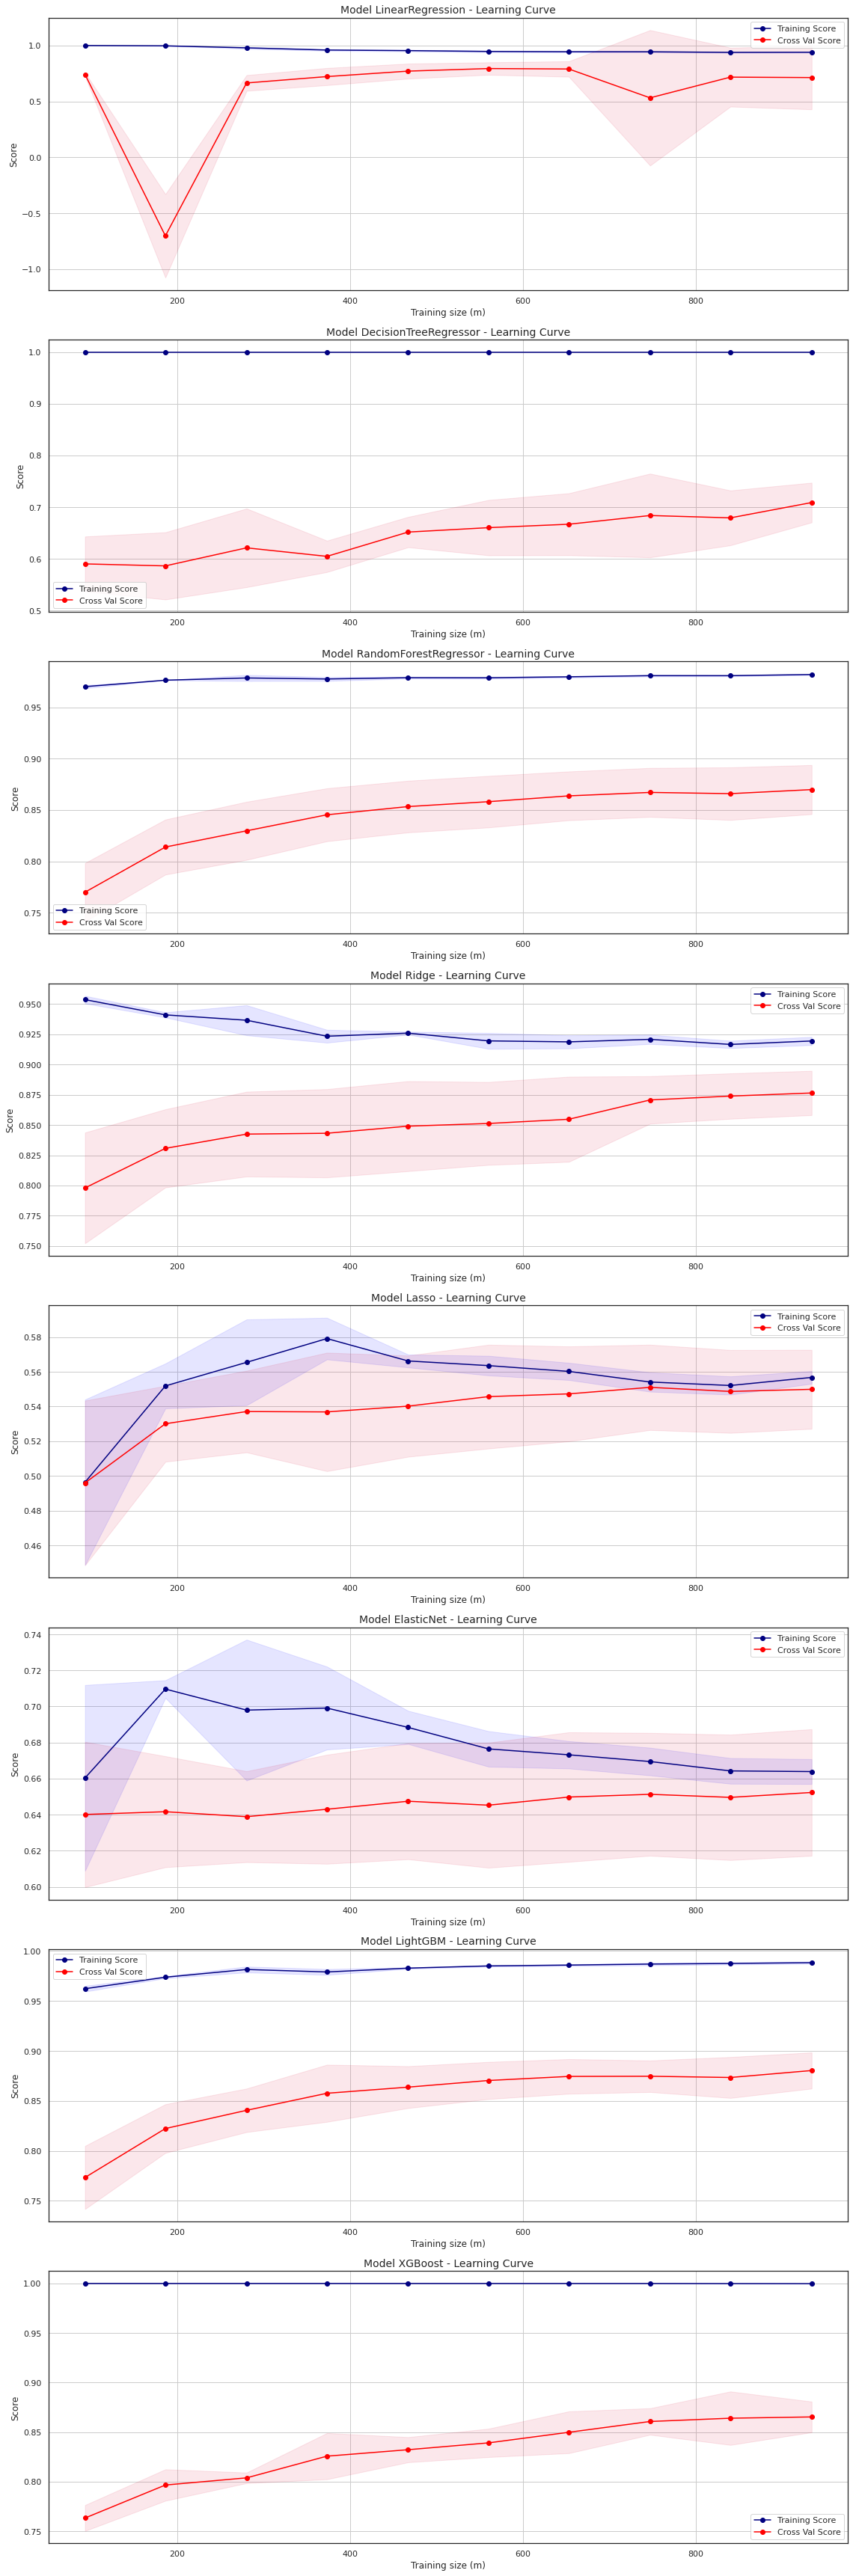

In [66]:
# Plotting learning curves
trainer.plot_learning_curve()

<a id="4.7"></a>
<font color="dimgrey" size=+2.0><b>4.7 Feature Selection</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

So far, we have trained some regression models and graphically visualized the performance obtained in each case. All training was based on a database obtained after the extensive session of preparation of the set where it was possible to generate a dataset of 265 features to be analyzed.

We saw, in the correlation matrix, that not all features actively contribute to a good performance of predictive models. Some even have redundancy among themselves and, in a way, contribute to a certain worsening in this performance. That said, we will try, in this next step, to apply a `feature selection` process to consider only the most important features for the training. In this case, we will create a new training pipeline with an additional step for the selection process, leaving the `GridSearchCV` the answer for the best combination of features that maximizes a defined performance metric.

In [67]:
# Importing class
from mlcomposer.transformers import FeatureSelection
from sklearn.model_selection import RandomizedSearchCV

# Train data
X = X_train.append(X_test)
y = np.concatenate((y_train, y_test))

# Preparing complete training data
X_prep = prep_pipeline.fit_transform(X)

# Returning features and filtering it
encoded_features = prep_pipeline.named_transformers_['cat'].named_steps['encoder'].features_after_encoding
X_prep_df = pd.DataFrame(X_prep, columns=num_features + encoded_features)
X_prep = np.array(X_prep_df.loc[:, MODEL_FEATURES])

# Returning the selected model
model_key = 'LightGBM'
model = trainer.get_estimator(model_key)
feat_imp = model.feature_importances_

# Building a feature selection pipeline
selector_pipe = Pipeline([
    ('selector', FeatureSelection(feature_importance=feat_imp, k=len(MODEL_FEATURES))),
    ('model', model)
])

# Defining search hyperparameters space
selector_grid = [{
    'selector__k': list(range(1, len(MODEL_FEATURES)))
}]

# Applying search on full training data already prepared
rnd_search_prep = RandomizedSearchCV(selector_pipe, selector_grid, cv=5, 
                                     scoring='neg_mean_squared_error', verbose=-1, n_jobs=-1)
rnd_search_prep.fit(X_prep, y)

# Returning the best combination
best_pipe = rnd_search_prep.best_estimator_
best_pipe

DEBUG;2021-05-12 01:14:15;trainer.py;trainer;3663;Returning estimator for model LightGBM stored on class attribute
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.9s finished


Pipeline(steps=[('selector',
                 FeatureSelection(feature_importance=array([ 25,  98, 199,  85, 101, 108,  98,  87, 116,  17, 112, 184, 141,
        39,   0, 219,  23,   1,  10,   5,  18,   3,  28,  26,  79,  32,
       156,  59, 134,  19,   4,  13,   0,   0,  65,  42,   0,   4,   0,
        10,  11,   0,   0,   0,   0,   1,   0,   0,   1,   0,   0,  13,
         0,   5,   1,   1,   5,   0,   0,   0,   0,   2,   9,   5,   0,
         8,   0,   1,   1,   0,   0,   1,  13,   0,   7,   2,  10,  29,
         4,   8,   0,   6,   0,  15,   0,   0,   0,   0,   0,   0,   1,
         1,   3,   0,   3,   6,   1,   0,   0,   4,   0,   0,   9,   0,
         3,   0,   0,   0,   4,   8,   7,   2,   3,   3,   0,   3,   2...
         4,   0,   0,   6,   4,   0,   7,   0,   1,   8,   4,   0,   0,
         0,   0,   6,   0,   7,   8,   0,  12,   0,   0,   1,   0,   0,
        13,   1,   8,   0,   7,   0,  13,   0,   4,   0,   0,   0,   7,
         0,   0,   1,   3,   0,   0,   7,   0,   0, 

In [68]:
# Final rmse on training data
from sklearn.model_selection import cross_val_score

y_scores = cross_val_score(best_pipe, X_train_prep, y_train, cv=5, scoring='neg_mean_squared_error')
best_rmse = np.sqrt(-y_scores).mean()
best_rmse

0.1344667129083938

<a id="5"></a>
<font color="darkslateblue" size=+2.5><b>5 Predicting: Predicting Housing Prices</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Considering the need for a certain refinement in the training stage, we will use what we have so far to make predictions on a test basis given by the task. In this session, we will read this base, apply the necessary transformations and use the best Regression model chosen to determine property prices.

In [69]:
# Reading test dataset
df_test = pd.read_csv(os.path.join(DATA_PATH, TEST_FILENAME))
print(f'Shape of df_test: {df_test.shape}')
df_test.head()

Shape of df_test: (1459, 80)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [70]:
def adjust_dataset_features(df_array_pipe, pipe_resulting_features, model_features):
    
    # Retornando set de features não inclusas no pipeline de produção
    not_included_features = [col for col in model_features if col not in pipe_resulting_features]
    
    # Transformando array resultante do pipeline em DataFrame
    df = pd.DataFrame(df_array_pipe, columns=pipe_resulting_features)
    
    # Adicionando colunas não inclusas (preenchimento com 0)
    for col in not_included_features:
        df[col] = 0
        
    # Ordenando base final para manter a estrutura do array utilizado no treinamento
    df = df.loc[:, model_features]
    
    # Retornando resultado em formato de array
    return np.array(df)

In [71]:
# Initial pipeline for predicting new data
initial_pred_pipeline = Pipeline([
    ('col_filter', ColumnSelection(features=[col for col in INITIAL_FEATURES if col != TARGET])),
    ('cat_agrup', CategoricalMapper(cat_dict=CAT_GROUP_DICT, other_tag=OTHER_TAG))
])

# Building a pipeline to be applied on new data
pred_pipeline = Pipeline([
    ('initial', initial_pred_pipeline),
    ('prep', prep_pipeline)
])

# Applying the pipeline
df_pred = pred_pipeline.fit_transform(df_test)

# Returning resulting features
cat_pred_features = pred_pipeline.named_steps['prep'].named_transformers_['cat'].named_steps['encoder'].features_after_encoding
pred_features = num_features + cat_pred_features

# Adjusting the final data with features considered on training
X_pred = adjust_dataset_features(df_pred, pred_features, MODEL_FEATURES)

print(f'Shape of final X_train_prep: {X_train_prep.shape}')
print(f'Shape of final X_pred: {X_pred.shape}')

Shape of final X_train_prep: (1168, 264)
Shape of final X_pred: (1459, 264)


To maintain the equity of features considered in the training, the function `adjust_dataset_features()` was built. With it, the preparation pipelines can be applied in any input base and, in cases where the final number of features is not the same (due to the lack of categorical entries or other relevant features), the function acts to normalize this case , adding "fake features" to the final test base.

In [72]:
# Returning model
model_key = 'LightGBM'
model = trainer.regressors_info[model_key]['estimator']

# Predicting housing prices and preparing submission
y_pred = model.predict(X_pred)
df_test['SalePrice'] = np.exp(y_pred)
df_sub = df_test.loc[:, ['Id', 'SalePrice']]
df_sub.to_csv('submission.csv', index=False)